# Künstliche Intelligenz in kleinen und mittleren Betrieben ###

In [1]:
# Importieren wichtiger Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from abc_analysis import abc_analysis # ABC-Analyse Version 1
%pip install inventorize3 # für ABC-Analyse Version 2
import inventorize3 as inv # für ABC-Analyse Version 2

ERROR: Invalid requirement: '#'


Note: you may need to restart the kernel to use updated packages.


# Offenne To-DOs
<font color=red>
<b> # !!! OFFENE TO-DOS !!! </b>

</font>

* Saisonalität abdecken, indem wir Monate als Dummy Variablen 
* Variable Importance Plot aufstellen
* Rausfinden warum man Ferientage zweimal laden muss, damit sie funktionieren


# 1. Einlesen und der Daten und erstes Understanding

Zu Beginn importieren wir die Daten und machen uns ein Bild vom Datensatz, seinen Dimensionen und den Wertebereichen.


In [2]:
data  = pd.read_csv("data.csv")
data.head()

,Zeitstempel,Filiale,Artikel,Menge,Umsatz,Bestellungen,Temperatur,Niederschlag,Globalstrahlung,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag
0,2016-01-03 08:01:46,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN
1,2016-01-03 08:04:45,Sulgen Filiale,Buttergipfeli,2.0,2.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN
2,2016-01-03 08:09:21,Sulgen Filiale,Buttergipfeli,12.0,15.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN
3,2016-01-03 08:11:19,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN
4,2016-01-03 08:11:19,Sulgen Filiale,Buttergipfeli,4.0,5.2,0.0,NaN,0.0,NaN,NaN,0.0,NaN


In [3]:
test = data[(data['Menge'] > 0) & (data['Bestellungen'] > 0)]
test.head()


,Zeitstempel,Filiale,Artikel,Menge,Umsatz,Bestellungen,Temperatur,Niederschlag,Globalstrahlung,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag
189418,2017-11-01 05:34:48,Sulgen Filiale,Laugengi.mit SoBlu,2.0,3.0,70.0,1.1,0.0,5.0,5.175,0.0,92.791667
189419,2017-11-01 05:38:12,Sulgen Filiale,Il pollo forte gefüllt,2.0,15.0,22.0,1.1,0.0,5.0,5.175,0.0,92.791667
189420,2017-11-01 05:38:23,Sulgen Filiale,Buttergipfeli,2.0,2.6,50.0,1.1,0.0,5.0,5.175,0.0,92.791667
189421,2017-11-01 05:50:23,Sulgen Filiale,Buttergipfeli,2.0,2.6,50.0,1.1,0.0,5.0,5.175,0.0,92.791667
189422,2017-11-01 05:54:32,Sulgen Filiale,Buttergipfeli,2.0,2.6,50.0,1.1,0.0,5.0,5.175,0.0,92.791667


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727754 entries, 0 to 727753
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Zeitstempel                  727754 non-null  object 
 1   Filiale                      727754 non-null  object 
 2   Artikel                      727754 non-null  object 
 3   Menge                        727754 non-null  float64
 4   Umsatz                       727754 non-null  float64
 5   Bestellungen                 727754 non-null  float64
 6   Temperatur                   718722 non-null  float64
 7   Niederschlag                 725226 non-null  float64
 8   Globalstrahlung              718722 non-null  float64
 9   Temperatur Schnitt Tag       719687 non-null  float64
 10  Niederschlag Summe Tag       727754 non-null  float64
 11  Globalstrahlung Schnitt Tag  719687 non-null  float64
dtypes: float64(9), object(3)
memory usage: 66.6+ MB


Jetzt verschaffen wir uns einen Überblick welche Produkte im Datensatz enthalten sind.

In [5]:
n_produkte = data["Artikel"].unique()

# Erstellen einer Produktliste mit der verkauften Anzahl
produkt_liste = data[["Artikel", "Menge"]].groupby("Artikel").sum().sort_values(by="Menge", ascending=False).reset_index()


print("Es sind folgende Produkte im Datensatz enthalten: ")
print(produkt_liste)

Es sind folgende Produkte im Datensatz enthalten: 
                   Artikel     Menge
0            Buttergipfeli  384812.0
1       Laugengi.mit SoBlu  187591.0
2               Maisgipfel  180437.6
3             Laugenbrötli   95970.0
4            Weggli normal   83320.0
5          St. Gallerbürli   79307.0
6           Crèmeschnitten   71149.0
7            BT Nussgipfel   64025.3
8              Quarkzöpfli   63098.0
9        Butterzopf mittel   62872.0
10           Schoggibrötli   43954.0
11  Il pollo forte gefüllt   42164.0
12     Hefe-Vanille-Weggli   40206.0
13           Erdbeertörtli   26901.0


<font color=red>
<b> Offene Fragen: </b>

Warum gibt es bei Nussgipfel und Maisgipfel Dezimalstellen?
</font>


# 2. Vorbereitung des Dataframes

Als nächstes bereiten wir den Datensatz auf. 

Dafür werden :
- Spalten transformiert
- Ungenutzte Spalten entfernt
- NA Werte gefüllt oder entfernt
- Outlier aus dem Datensatz entfernt


## 2.1. Transformation ganzer Spalten im Dataframe 

In [6]:
data_backup = data.copy()

# Transformation des Datensatzes
data["Zeitstempel"] = pd.to_datetime(data["Zeitstempel"])
data["Uhrzeit"] = pd.to_datetime(data["Zeitstempel"]).dt.time
data["Stunde"] = pd.to_datetime(data["Zeitstempel"]).dt.hour
data["Datum"] = pd.to_datetime(data["Zeitstempel"]).dt.date
data["Wochentag"] = pd.to_datetime(data["Zeitstempel"]).dt.day_name()

data.head()

,Zeitstempel,Filiale,Artikel,Menge,Umsatz,Bestellungen,Temperatur,Niederschlag,Globalstrahlung,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag
0,2016-01-03 08:01:46,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:01:46,8,2016-01-03,Sunday
1,2016-01-03 08:04:45,Sulgen Filiale,Buttergipfeli,2.0,2.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:04:45,8,2016-01-03,Sunday
2,2016-01-03 08:09:21,Sulgen Filiale,Buttergipfeli,12.0,15.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:09:21,8,2016-01-03,Sunday
3,2016-01-03 08:11:19,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:11:19,8,2016-01-03,Sunday
4,2016-01-03 08:11:19,Sulgen Filiale,Buttergipfeli,4.0,5.2,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:11:19,8,2016-01-03,Sunday


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727754 entries, 0 to 727753
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Zeitstempel                  727754 non-null  datetime64[ns]
 1   Filiale                      727754 non-null  object        
 2   Artikel                      727754 non-null  object        
 3   Menge                        727754 non-null  float64       
 4   Umsatz                       727754 non-null  float64       
 5   Bestellungen                 727754 non-null  float64       
 6   Temperatur                   718722 non-null  float64       
 7   Niederschlag                 725226 non-null  float64       
 8   Globalstrahlung              718722 non-null  float64       
 9   Temperatur Schnitt Tag       719687 non-null  float64       
 10  Niederschlag Summe Tag       727754 non-null  float64       
 11  Globalstrahlung Schnitt Ta

In [8]:
# Konvertieren der Spalten in die richtige Datentypen
data["Datum"] = pd.to_datetime(data["Datum"]).dt.date
wochentag_reihenfolge = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data["Wochentag"] = pd.Categorical(data["Wochentag"], categories = wochentag_reihenfolge, ordered = True)
data['Monat'] = pd.to_datetime(data['Datum']).dt.month

# Entfernen nicht mehr benötigter Spalten
data = data.drop(columns = ["Filiale", "Zeitstempel"], axis = "columns")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727754 entries, 0 to 727753
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Artikel                      727754 non-null  object  
 1   Menge                        727754 non-null  float64 
 2   Umsatz                       727754 non-null  float64 
 3   Bestellungen                 727754 non-null  float64 
 4   Temperatur                   718722 non-null  float64 
 5   Niederschlag                 725226 non-null  float64 
 6   Globalstrahlung              718722 non-null  float64 
 7   Temperatur Schnitt Tag       719687 non-null  float64 
 8   Niederschlag Summe Tag       727754 non-null  float64 
 9   Globalstrahlung Schnitt Tag  719687 non-null  float64 
 10  Uhrzeit                      727754 non-null  object  
 11  Stunde                       727754 non-null  int64   
 12  Datum                        727754 non-null

In [9]:
print("Der Datensatz geht von {} bis {}.".format(data["Datum"].min(), data["Datum"].max()))

Der Datensatz geht von 2016-01-03 bis 2022-02-11.


In [10]:
data.head()

,Artikel,Menge,Umsatz,Bestellungen,Temperatur,Niederschlag,Globalstrahlung,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat
0,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:01:46,8,2016-01-03,Sunday,1
1,Buttergipfeli,2.0,2.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:04:45,8,2016-01-03,Sunday,1
2,Buttergipfeli,12.0,15.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:09:21,8,2016-01-03,Sunday,1
3,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:11:19,8,2016-01-03,Sunday,1
4,Buttergipfeli,4.0,5.2,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:11:19,8,2016-01-03,Sunday,1


## 2.2 Trimmen des Datensatzes 

Im nächsten Schritt werden Outlier aus dem Datensatz gelöscht.

In [11]:
# Im nächsten Schritt prüfen wir Transaktionen außerhalb der Öffnungszeiten. Im Maximum hat die Bäckerrei von 5:30 bis 19:00 geöffnet.
# Zu erst werden Transaktionen vor Öffnung geprüft.
data_4_uhr = data[data["Stunde"] == 4]
data_4_uhr.head()

# Da sich in einem Histogramm über den Umsatz pro Uhrzeit pro Tag Ausreißer um 4 Uhr finden, werden alle Einträge vor 5 Uhr entfernt.
data = data[data["Stunde"] >= 5]

In [12]:
# 
data_20_uhr = data[data["Stunde"] == 20]
data_20_uhr.head()

,Artikel,Menge,Umsatz,Bestellungen,Temperatur,Niederschlag,Globalstrahlung,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat
28671,Hefe-Vanille-Weggli,1.0,1.7553,0.0,11.5,0.0,0.0,11.441667,0.0,257.291667,20:01:02,20,2016-04-21,Thursday,4
28672,BT Nussgipfel,1.0,1.9947,0.0,11.5,0.0,0.0,11.441667,0.0,257.291667,20:01:02,20,2016-04-21,Thursday,4


Nun löschen wir alle Duplikate im Dataframe

In [13]:
data.drop_duplicates(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719185 entries, 0 to 727753
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Artikel                      719185 non-null  object  
 1   Menge                        719185 non-null  float64 
 2   Umsatz                       719185 non-null  float64 
 3   Bestellungen                 719185 non-null  float64 
 4   Temperatur                   710279 non-null  float64 
 5   Niederschlag                 716688 non-null  float64 
 6   Globalstrahlung              710279 non-null  float64 
 7   Temperatur Schnitt Tag       711227 non-null  float64 
 8   Niederschlag Summe Tag       719185 non-null  float64 
 9   Globalstrahlung Schnitt Tag  711227 non-null  float64 
 10  Uhrzeit                      719185 non-null  object  
 11  Stunde                       719185 non-null  int64   
 12  Datum                        719185 non-null

Da der Datensatz sowohl 719185 Werte vor und nach dem Löschen hatte, kann man davon ausgehen, dass es keine Duplikate gab.

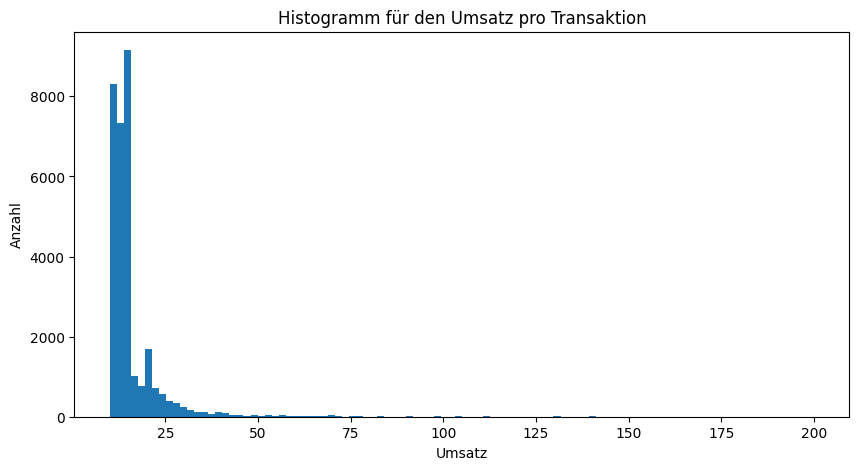

In [14]:
# Erstellen eines Histogramms für den Umsatz pro Transaktion
plt.figure(figsize= (10, 5))
plt.hist(data["Umsatz"], bins = 100, range= [10,200])
plt.title("Histogramm für den Umsatz pro Transaktion")
plt.xlabel("Umsatz")
plt.ylabel("Anzahl")
plt.show()

Bevor wir mit der Datenanalyse beginnen müssen wir noch Spalten droppen

In [99]:
corr = data.corr()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap).format(precision=2)

C:\Users\marin\AppData\Local\Temp\ipykernel_16372\4101275082.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

Als nächstes droppen wir Temeratur und Globalstrahlung, da deren Informationen ebenfalls durch den Tagesdurchschnitt erklärt werden können.

In [16]:
data = data.drop(columns = ["Temperatur", "Globalstrahlung"], axis = "columns")
data.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,2016-01-03,Sunday,1
1,Buttergipfeli,2.0,2.6,0.0,0.0,NaN,0.0,NaN,08:04:45,8,2016-01-03,Sunday,1
2,Buttergipfeli,12.0,15.6,0.0,0.0,NaN,0.0,NaN,08:09:21,8,2016-01-03,Sunday,1
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,Sunday,1
4,Buttergipfeli,4.0,5.2,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,Sunday,1


## 2.3 Hinzufügen weiterer Features

### 2.3.1 Schulferien

In [17]:
import datetime
erstes_datum = data['Datum'].min()
letztes_datum = data['Datum'].max()

print("Das erste Datum im Datensatz ist:", erstes_datum)
print("Das letzte Datum im Datensatz ist:", letztes_datum)

# Daten von https://av.tg.ch/public/upload/assets/8713/10_Jahresplan_Schulferien_Volksschule_2019_-_2029.pdf?fp=3
# Daten von https://www.schulferien.org/schweiz/kalender/thurgau/2019/

# Ferienlisten nach Ferienzeit erstellen

gesamtliste_herbstferien = []
gesamtliste_weihnachtsferien = []
gesamtliste_sportferien = []
gesamtliste_fruehlingsferien = []
gesamtliste_pfingstferien = []
gesamtliste_sommerferien = []


Das erste Datum im Datensatz ist: 2016-01-03
Das letzte Datum im Datensatz ist: 2022-02-11


#### Schuljahr 2015/ 2016

In [18]:
# Herbstferien Schuljahr 2015 / 2016
# brauchen wir nicht

# Weihnachtsferien Schuljahr 2015 / 2016
ferienbeginn_weihnachten2015_2016 = datetime.date(2015, 12, 24)
ferienende_weihnachten2015_2016 = datetime.date(2016, 1, 3)

current_date = ferienbeginn_weihnachten2015_2016
weihnachtsferien_tg_sj_2015_2016 = []

while current_date <= ferienende_weihnachten2015_2016:
    weihnachtsferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2015 / 2016
ferienbeginn_sport2015_2016 = datetime.date(2016, 2, 1)
ferienende_sport2015_2016 = datetime.date(2016, 2, 7)

current_date = ferienbeginn_sport2015_2016
sportferien_tg_sj_2015_2016 = []

while current_date <= ferienende_sport2015_2016:
    sportferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2015 / 2016
ferienbeginn_fruehling2015_2016 = datetime.date(2016, 3, 25)
ferienende_fruehling2015_2016 = datetime.date(2016, 4, 10)

current_date = ferienbeginn_fruehling2015_2016
fruehlingsferien_tg_sj_2015_2016 = []

while current_date <= ferienende_fruehling2015_2016:
    fruehlingsferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2015 / 2016
ferienbeginn_pfingsten2015_2016 = datetime.date(2016, 5, 5)
ferienende_pfingsten2015_2016 = datetime.date(2016, 5, 16)

current_date = ferienbeginn_pfingsten2015_2016
pfingstferien_tg_sj_2015_2016 = []

while current_date <= ferienende_pfingsten2015_2016:
    pfingstferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2015 / 2016
ferienbeginn_sommer2015_2016 = datetime.date(2016, 7, 11)
ferienende_sommer2015_2016 = datetime.date(2016, 8, 14)

current_date = ferienbeginn_sommer2015_2016
sommerferien_tg_sj_2015_2016 = []

while current_date <= ferienende_sommer2015_2016:
    sommerferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)


gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2015_2016)
gesamtliste_sportferien.extend(sportferien_tg_sj_2015_2016)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2015_2016)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2015_2016)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2015_2016)

#### Schuljahr 2016/ 2017

In [19]:
# Herbstferien Schuljahr 2016 / 2017
ferienbeginn_herbst2016_2017 = datetime.date(2016, 10, 10)
ferienende_herbst2016_2017 = datetime.date(2016, 10, 23)

current_date = ferienbeginn_herbst2016_2017
herbstferien_tg_sj_2016_2017 = []

while current_date <= ferienende_herbst2016_2017:
    herbstferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2016 / 2017
ferienbeginn_weihnachten2016_2017 = datetime.date(2016, 12, 26)
ferienende_weihnachten2016_2017 = datetime.date(2017, 1, 8)

current_date = ferienbeginn_weihnachten2016_2017
weihnachtsferien_tg_sj_2016_2017 = []

while current_date <= ferienende_weihnachten2016_2017:
    weihnachtsferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2016 / 2017
ferienbeginn_sport2016_2017 = datetime.date(2017, 1, 30)
ferienende_sport2016_2017 = datetime.date(2017, 2, 5)

current_date = ferienbeginn_sport2016_2017
sportferien_tg_sj_2016_2017 = []

while current_date <= ferienende_sport2016_2017:
    sportferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2016 / 2017
ferienbeginn_fruehling2016_2017 = datetime.date(2017, 4, 3)
ferienende_fruehling2016_2017 = datetime.date(2017, 4, 17)

current_date = ferienbeginn_fruehling2016_2017
fruehlingsferien_tg_sj_2016_2017 = []

while current_date <= ferienende_fruehling2016_2017:
    fruehlingsferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2016 / 2017
ferienbeginn_pfingsten2016_2017 = datetime.date(2017, 5, 25)
ferienende_pfingsten2016_2017 = datetime.date(2017, 6, 5)

current_date = ferienbeginn_pfingsten2016_2017
pfingstferien_tg_sj_2016_2017 = []

while current_date <= ferienende_pfingsten2016_2017:
    pfingstferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2016 / 2017
ferienbeginn_sommer2016_2017 = datetime.date(2017, 7, 10)
ferienende_sommer2016_2017 = datetime.date(2017, 8, 13)

current_date = ferienbeginn_sommer2016_2017
sommerferien_tg_sj_2016_2017 = []

while current_date <= ferienende_sommer2016_2017:
    sommerferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2016_2017)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2016_2017)
gesamtliste_sportferien.extend(sportferien_tg_sj_2016_2017)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2016_2017)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2016_2017)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2016_2017)



#### Schuljahr 2017/ 2018

In [20]:
# Herbstferien Schuljahr 2017 / 2018
ferienbeginn_herbst2017_2018 = datetime.date(2017, 10, 9)
ferienende_herbst2017_2018 = datetime.date(2017, 10, 22)

current_date = ferienbeginn_herbst2017_2018
herbstferien_tg_sj_2017_2018 = []

while current_date <= ferienende_herbst2017_2018:
    herbstferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2017 / 2018
ferienbeginn_weihnachten2017_2018 = datetime.date(2017, 12, 25)
ferienende_weihnachten2017_2018 = datetime.date(2018, 1, 7)

current_date = ferienbeginn_weihnachten2017_2018
weihnachtsferien_tg_sj_2017_2018 = []

while current_date <= ferienende_weihnachten2017_2018:
    weihnachtsferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2017 / 2018
ferienbeginn_sport2017_2018 = datetime.date(2018, 1, 29)
ferienende_sport2017_2018 = datetime.date(2018, 2, 4)

current_date = ferienbeginn_sport2017_2018
sportferien_tg_sj_2017_2018 = []

while current_date <= ferienende_sport2017_2018:
    sportferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2017 / 2018
ferienbeginn_fruehling2017_2018 = datetime.date(2018, 3, 30)
ferienende_fruehling2017_2018 = datetime.date(2018, 4, 15)

current_date = ferienbeginn_fruehling2017_2018
fruehlingsferien_tg_sj_2017_2018 = []

while current_date <= ferienende_fruehling2017_2018:
    fruehlingsferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2017 / 2018
ferienbeginn_pfingsten2017_2018 = datetime.date(2018, 5, 10)
ferienende_pfingsten2017_2018 = datetime.date(2018, 5, 21)

current_date = ferienbeginn_pfingsten2017_2018
pfingstferien_tg_sj_2017_2018 = []

while current_date <= ferienende_pfingsten2017_2018:
    pfingstferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2017 / 2018
ferienbeginn_sommer2017_2018 = datetime.date(2018, 7, 9)
ferienende_sommer2017_2018 = datetime.date(2018, 8, 12)

current_date = ferienbeginn_sommer2017_2018
sommerferien_tg_sj_2017_2018 = []

while current_date <= ferienende_sommer2017_2018:
    sommerferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2017_2018)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2017_2018)
gesamtliste_sportferien.extend(sportferien_tg_sj_2017_2018)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2017_2018)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2017_2018)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2017_2018)

#### Schuljahr 2018/ 2019

In [21]:
# Herbstferien Schuljahr 2018 / 2019
ferienbeginn_herbst2018_2019 = datetime.date(2018, 10, 8)
ferienende_herbst2018_2019 = datetime.date(2018, 10, 21)

current_date = ferienbeginn_herbst2018_2019
herbstferien_tg_sj_2018_2019 = []

while current_date <= ferienende_herbst2018_2019:
    herbstferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2018 / 2019
ferienbeginn_weihnachten2018_2019 = datetime.date(2018, 12, 24)
ferienende_weihnachten2018_2019 = datetime.date(2019, 1, 6)

current_date = ferienbeginn_weihnachten2018_2019
weihnachtsferien_tg_sj_2018_2019 = []

while current_date <= ferienende_weihnachten2018_2019:
    weihnachtsferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2018 / 2019
ferienbeginn_sport2018_2019 = datetime.date(2019, 1, 28)
ferienende_sport2018_2019 = datetime.date(2019, 2, 3)

current_date = ferienbeginn_sport2018_2019
sportferien_tg_sj_2018_2019 = []

while current_date <= ferienende_sport2018_2019:
    sportferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2018 / 2019
ferienbeginn_fruehling2018_2019 = datetime.date(2019, 4, 19)
ferienende_fruehling2018_2019 = datetime.date(2019, 4, 22)

current_date = ferienbeginn_fruehling2018_2019
fruehlingsferien_tg_sj_2018_2019 = []

while current_date <= ferienende_fruehling2018_2019:
    fruehlingsferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2018 / 2019
ferienbeginn_pfingsten2018_2019 = datetime.date(2019, 5, 30)
ferienende_pfingsten2018_2019 = datetime.date(2019, 6, 10)

current_date = ferienbeginn_pfingsten2018_2019
pfingstferien_tg_sj_2018_2019 = []

while current_date <= ferienende_pfingsten2018_2019:
    pfingstferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2018 / 2019
ferienbeginn_sommer2018_2019 = datetime.date(2019, 7, 8)
ferienende_sommer2018_2019 = datetime.date(2019, 8, 11)

current_date = ferienbeginn_sommer2018_2019
sommerferien_tg_sj_2018_2019 = []

while current_date <= ferienende_sommer2018_2019:
    sommerferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2018_2019)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2018_2019)
gesamtliste_sportferien.extend(sportferien_tg_sj_2018_2019)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2018_2019)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2018_2019)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2018_2019)

#### Schuljahr 2019/ 2020

In [22]:
# Herbstferien Schuljahr 2019 / 2020
ferienbeginn_herbst2019_2020 = datetime.date(2019, 10, 7)
ferienende_herbst2019_2020 = datetime.date(2019, 10, 20)

current_date = ferienbeginn_herbst2019_2020
herbstferien_tg_sj_2019_2020 = []

while current_date <= ferienende_herbst2019_2020:
    herbstferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2019 / 2020
ferienbeginn_weihnachten2019_2020 = datetime.date(2019, 12, 23)
ferienende_weihnachten2019_2020 = datetime.date(2020, 1, 5)

current_date = ferienbeginn_weihnachten2019_2020
weihnachtsferien_tg_sj_2019_2020 = []

while current_date <= ferienende_weihnachten2019_2020:
    weihnachtsferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2019 / 2020
ferienbeginn_sport2019_2020 = datetime.date(2020, 1, 27)
ferienende_sport2019_2020 = datetime.date(2020, 2, 2)

current_date = ferienbeginn_sport2019_2020
sportferien_tg_sj_2019_2020 = []

while current_date <= ferienende_sport2019_2020:
    sportferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2019 / 2020
ferienbeginn_fruehling2019_2020 = datetime.date(2020, 3, 30)
ferienende_fruehling2019_2020 = datetime.date(2020, 4, 13)

current_date = ferienbeginn_fruehling2019_2020
fruehlingsferien_tg_sj_2019_2020 = []

while current_date <= ferienende_fruehling2019_2020:
    fruehlingsferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2019 / 2020
ferienbeginn_pfingsten2019_2020 = datetime.date(2020, 5, 21)
ferienende_pfingsten2019_2020 = datetime.date(2020, 6, 1)

current_date = ferienbeginn_pfingsten2019_2020
pfingstferien_tg_sj_2019_2020 = []

while current_date <= ferienende_pfingsten2019_2020:
    pfingstferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2019 / 2020
ferienbeginn_sommer2019_2020 = datetime.date(2020, 7, 6)
ferienende_sommer2019_2020 = datetime.date(2020, 8, 9)

current_date = ferienbeginn_sommer2019_2020
sommerferien_tg_sj_2019_2020 = []

while current_date <= ferienende_sommer2019_2020:
    sommerferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2019_2020)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2019_2020)
gesamtliste_sportferien.extend(sportferien_tg_sj_2019_2020)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2019_2020)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2019_2020)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2019_2020)

#### Schuljahr 2020/ 2021

In [23]:
# Herbstferien Schuljahr 2020 / 2021
ferienbeginn_herbst2020_2021 = datetime.date(2020, 10, 5)
ferienende_herbst2020_2021 = datetime.date(2020, 10, 18)

current_date = ferienbeginn_herbst2020_2021
herbstferien_tg_sj_2020_2021 = []

while current_date <= ferienende_herbst2020_2021:
    herbstferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2020 / 2021
ferienbeginn_weihnachten2020_2021 = datetime.date(2020, 12, 21)
ferienende_weihnachten2020_2021 = datetime.date(2021, 1, 3)

current_date = ferienbeginn_weihnachten2020_2021
weihnachtsferien_tg_sj_2020_2021 = []

while current_date <= ferienende_weihnachten2020_2021:
    weihnachtsferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2020 / 2021
ferienbeginn_sport2020_2021 = datetime.date(2021, 2, 1)
ferienende_sport2020_2021 = datetime.date(2021, 2, 7)

current_date = ferienbeginn_sport2020_2021
sportferien_tg_sj_2020_2021 = []

while current_date <= ferienende_sport2020_2021:
    sportferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2020 / 2021
ferienbeginn_fruehling2020_2021 = datetime.date(2021, 4, 2)
ferienende_fruehling2020_2021 = datetime.date(2021, 4, 18)

current_date = ferienbeginn_fruehling2020_2021
fruehlingsferien_tg_sj_2020_2021 = []

while current_date <= ferienende_fruehling2020_2021:
    fruehlingsferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2020 / 2021
ferienbeginn_pfingsten2020_2021 = datetime.date(2021, 5, 13)
ferienende_pfingsten2020_2021 = datetime.date(2021, 5, 24)

current_date = ferienbeginn_pfingsten2020_2021
pfingstferien_tg_sj_2020_2021 = []

while current_date <= ferienende_pfingsten2020_2021:
    pfingstferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2020 / 2021
ferienbeginn_sommer2020_2021 = datetime.date(2021, 7, 12)
ferienende_sommer2020_2021 = datetime.date(2021, 8, 15)

current_date = ferienbeginn_sommer2020_2021
sommerferien_tg_sj_2020_2021 = []

while current_date <= ferienende_sommer2020_2021:
    sommerferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2020_2021)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2020_2021)
gesamtliste_sportferien.extend(sportferien_tg_sj_2020_2021)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2020_2021)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2020_2021)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2020_2021)

#### Schuljahr 2021/ 2022

In [24]:
# Herbstferien Schuljahr 2021 / 2022
ferienbeginn_herbst2021_2022 = datetime.date(2021, 10, 11)
ferienende_herbst2021_2022 = datetime.date(2021, 10, 24)

current_date = ferienbeginn_herbst2021_2022
herbstferien_tg_sj_2021_2022 = []

while current_date <= ferienende_herbst2021_2022:
    herbstferien_tg_sj_2021_2022.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2021 / 2022
ferienbeginn_weihnachten2021_2022 = datetime.date(2021, 12, 20)
ferienende_weihnachten2021_2022 = datetime.date(2022, 1, 2)

current_date = ferienbeginn_weihnachten2021_2022
weihnachtsferien_tg_sj_2021_2022 = []

while current_date <= ferienende_weihnachten2021_2022:
    weihnachtsferien_tg_sj_2021_2022.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2021 / 2022
ferienbeginn_sport2021_2022 = datetime.date(2022, 1, 31)
ferienende_sport2021_2022 = datetime.date(2022, 2, 6)

current_date = ferienbeginn_sport2021_2022
sportferien_tg_sj_2021_2022 = []

while current_date <= ferienende_sport2021_2022:
    sportferien_tg_sj_2021_2022.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# mehr brauchen wir zurzeit nicht

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2021_2022)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2021_2022)
gesamtliste_sportferien.extend(sportferien_tg_sj_2021_2022)


#### Auswertungen

In [92]:
data['Ferienzeit TG'] = ''
data.loc[data['Datum'].isin(gesamtliste_herbstferien), 'Ferienzeit TG'] = 'Herbstferien'
data.loc[data['Datum'].isin(gesamtliste_weihnachtsferien), 'Ferienzeit TG'] = 'Weihnachtsferien'
data.loc[data['Datum'].isin(gesamtliste_sportferien), 'Ferienzeit TG'] = 'Sportferien'
data.loc[data['Datum'].isin(gesamtliste_fruehlingsferien), 'Ferienzeit TG'] = 'Frühlingsferien'
data.loc[data['Datum'].isin(gesamtliste_pfingstferien), 'Ferienzeit TG'] = 'Pfingstferien'
data.loc[data['Datum'].isin(gesamtliste_sommerferien), 'Ferienzeit TG'] = 'Sommerferien'

data.head()


,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat,Ferienzeit TG,Geschmack,Fastenzeit,Ramadan,Stückpreis
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,2023-04-17 08:01:46,8,2016-01-03,Sunday,1,Weihnachtsferien,süss,0,0,6.00
1,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,2023-04-17 08:11:19,8,2016-01-03,Sunday,1,Weihnachtsferien,süss,0,0,6.00
2,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,2023-04-17 08:23:41,8,2016-01-03,Sunday,1,Weihnachtsferien,süss,0,0,6.00
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,2023-04-17 08:26:53,8,2016-01-03,Sunday,1,Weihnachtsferien,süss,0,0,6.00
4,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,2023-04-17 08:39:05,8,2016-01-03,Sunday,1,Weihnachtsferien,süss,0,0,6.00


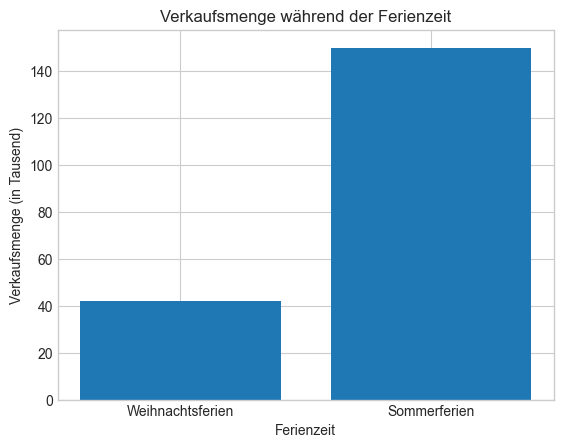

In [93]:


# Daten für Weihnachtsferien filtern und Menge summieren
weihnachtsferien = data[data['Ferienzeit TG'] == 'Weihnachtsferien']
weihnachtsferien_summe = weihnachtsferien['Menge'].sum() / 1000

# Daten für Sommerferien filtern und Menge summieren
sommerferien = data[data['Ferienzeit TG'] == 'Sommerferien']
sommerferien_summe = sommerferien['Menge'].sum() / 1000

# Balkendiagramm erstellen
ferien = ['Weihnachtsferien', 'Sommerferien']
verkaufsmenge = [weihnachtsferien_summe, sommerferien_summe]

plt.bar(ferien, verkaufsmenge)
plt.xlabel('Ferienzeit')
plt.ylabel('Verkaufsmenge (in Tausend)')
plt.title('Verkaufsmenge während der Ferienzeit')
plt.show()


Obwohl die Sommerferien nur doppelt so lange dauern wie die Winterferien, werden ca. drei Mal so viele Backwaren verkauft.

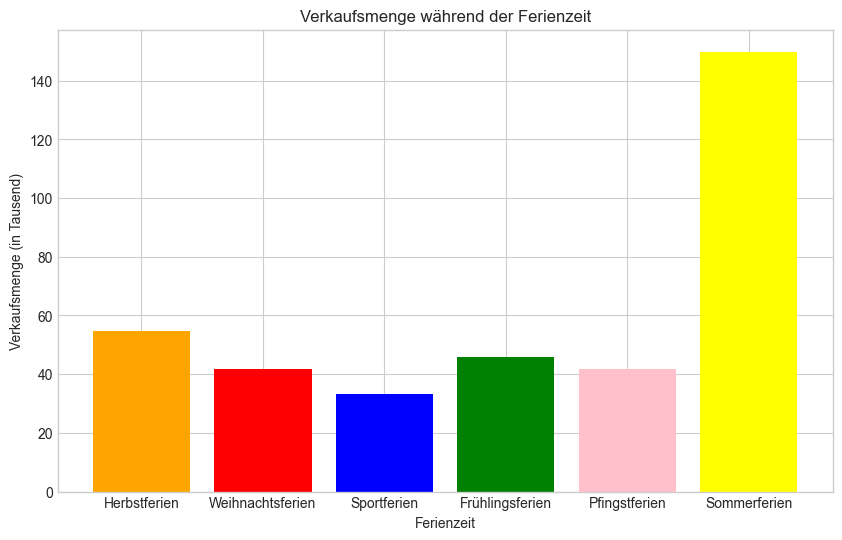

In [94]:
# Liste der Ferienzeiten
ferienzeiten = ['Herbstferien', 'Weihnachtsferien', 'Sportferien', 'Frühlingsferien', 'Pfingstferien', 'Sommerferien']

# Verkaufsmenge für jede Ferienzeit berechnen
verkaufsmenge = []
for ferienzeit in ferienzeiten:
    ferien = data[data['Ferienzeit TG'] == ferienzeit]
    ferien_summe = ferien['Menge'].sum() / 1000
    verkaufsmenge.append(ferien_summe)

# Farben definieren
farben = ['orange', 'red', 'blue', 'green', 'pink', 'yellow']

# Balkendiagramm erstellen
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(ferienzeiten, verkaufsmenge, color=farben)
ax.set_xlabel('Ferienzeit')
ax.set_ylabel('Verkaufsmenge (in Tausend)')
ax.set_title('Verkaufsmenge während der Ferienzeit')
plt.show()

Man sieht, die Zeit der Sommerferien ist mit Abstand die profitabelste Ferienzeit für die Bäckerei.

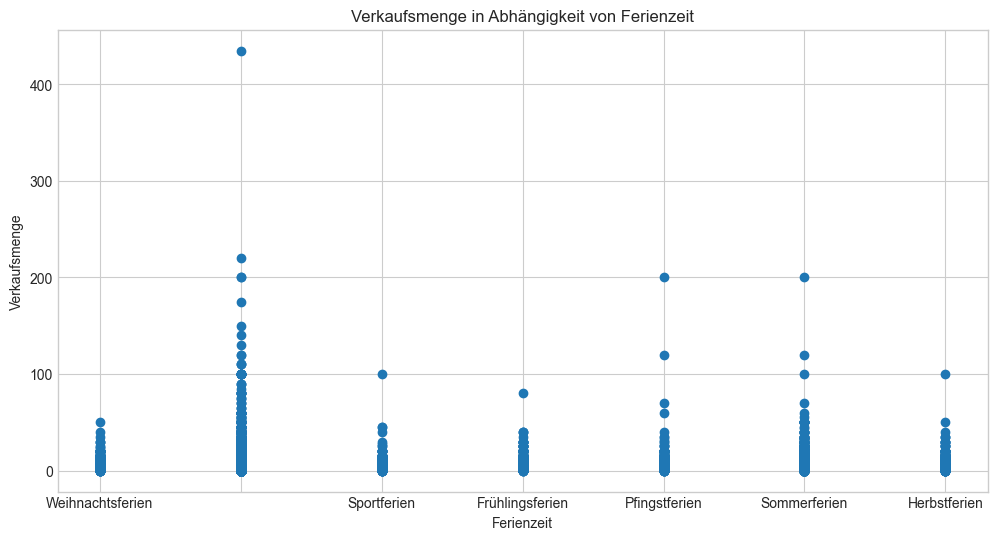

In [95]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(data['Ferienzeit TG'], data['Menge'])
ax.set_title('Verkaufsmenge in Abhängigkeit von Ferienzeit')
ax.set_xlabel('Ferienzeit')
ax.set_ylabel('Verkaufsmenge')
plt.show()

### 2.3.2 Süß und Herzhaft

Wir vermuten einen Zusammenhang zwischen verkaufter Menge und ob ein Produkt süß oder herzhaft ist. Eine Hypothese ist hier beispielsweise, dass an manchen Tagen mehr süße Produkte als Herzhafte Produkte verkauft werden. So könnten Kunden vielleicht Montags eher süßes Gebäck kaufen, weil sie gestresst wegen der Arbeit sind. Genauso gut, könnte ein Peak aber auch richtung Wochenende liegen, da viele sich dann eher etwas süßes vom Bäcker gönnen. 

(Anmerkung: Wir haben die Christliche Fastenzeit nur bis Gründonnerstag beschränkt, obwohl sie streng genommen bis Ostersonntag geht. Grund dafür ist, dass viele Gebäck für die Feiertage im Voraus einkaufen)

In [96]:
# Manuelle Klassifizierung der Produkte in 'süss' und 'herzhaft'
produkte_süß_herzhaft = pd.DataFrame(produkt_liste['Artikel'])
attribute = ['süss', 'herzhaft', 'herzhaft', 'herzhaft', 'herzhaft', 'herzhaft', 'süss', 'süss', 'süss', 'süss', 'süss', 'herzhaft','süss','süss']
produkte_süß_herzhaft['Geschmack'] = attribute
produkte_süß_herzhaft

# Daten mit den manuell klassifizierten Produkten zusammenführen
data = pd.merge(data, produkte_süß_herzhaft, on='Artikel')
data = data.rename(columns={'Geschmack_y': 'Geschmack'})


### 2.3.3 Fastenzeit

Als erstes Fügen wir die Christliche Fastenzeit zum Datensatz hinzu, da wir vermuten, dass einige Menschen in der Fastenzeit zumindest weniger Alkohol und Süßigkeiten konsumieren. 

In [102]:
import datetime 
start_datum = data["Datum"].min()
end_datum = data["Datum"].max()

# Fastenzeit start und Enddaten zwischen 2015 und 2022
fastenzeit = [
    (datetime.date(2015, 2, 18), datetime.date(2015, 4, 2)),
    (datetime.date(2016, 2, 10), datetime.date(2016, 3, 24)),
    (datetime.date(2017, 3, 1), datetime.date(2017, 4, 16)),
    (datetime.date(2018, 2, 14), datetime.date(2018, 3, 29)),
    (datetime.date(2019, 3, 6), datetime.date(2019, 4, 18)),
    (datetime.date(2020, 2, 26), datetime.date(2020, 4, 9)),
    (datetime.date(2021, 2, 17), datetime.date(2021, 4, 1)),
    (datetime.date(2022, 3, 2), datetime.date(2022, 4, 14)),
]
# Function to check if a date is within Lent period
def is_lent(date):
    for start, end in fastenzeit:
        # if start <= date <= end:
        if start <= pd.Timestamp(date).date() <= end:
            return 1
    return 0

# Anwendung der Funktion auf die Daten und Erstellung einer neuen Spalte
data['Fastenzeit'] = data['Datum'].apply(is_lent)


Als nächstes fügen wir eine Spalte hinzu die sagt, ob ein Verkauf während des Ramadhans stattgefunden hat. Wir vermuten hier einen Zusammenhang mit den Verkäufen, da sich auch eine Muslimische Gemeinde in der Nähe der Filiale befindet

In [103]:
# Ramadan Start und Enddaten zwischen 2015 und 2022
import datetime 
Ramadan = [
    (datetime.date(2015, 6, 17), datetime.date(2015, 7, 16)),
    (datetime.date(2016, 6, 6), datetime.date(2016, 7, 5)),
    (datetime.date(2017, 5, 26), datetime.date(2017, 6, 24)),
    (datetime.date(2018, 5, 16), datetime.date(2018, 6, 14)),
    (datetime.date(2019, 5, 5), datetime.date(2019, 6, 3)),
    (datetime.date(2020, 4, 23), datetime.date(2020, 5, 23)),
    (datetime.date(2021, 4, 12), datetime.date(2021, 5, 12)),
    (datetime.date(2022, 4, 1), datetime.date(2022, 5, 1)),
]

# Function to check if a date is within Ramadan period
def is_ramadan(date):
    for start, end in Ramadan:
        #if start <= date <= end:
        if start <= pd.Timestamp(date).date() <= end:

            return 1
    return 0

# Anwendung der Funktion auf die Daten und Erstellung einer neuen Spalte
data['Ramadan'] = data['Datum'].apply(is_ramadan)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719185 entries, 0 to 719184
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Artikel                      719185 non-null  object        
 1   Menge                        719185 non-null  float64       
 2   Umsatz                       719185 non-null  float64       
 3   Bestellungen                 719185 non-null  float64       
 4   Niederschlag                 716688 non-null  float64       
 5   Temperatur Schnitt Tag       711227 non-null  float64       
 6   Niederschlag Summe Tag       719185 non-null  float64       
 7   Globalstrahlung Schnitt Tag  711227 non-null  float64       
 8   Uhrzeit                      719185 non-null  datetime64[ns]
 9   Stunde                       719185 non-null  int64         
 10  Datum                        719185 non-null  datetime64[ns]
 11  Wochentag                 

# 3. Erste Plots

AttributeError: Rectangle.set() got an unexpected keyword argument 'size'

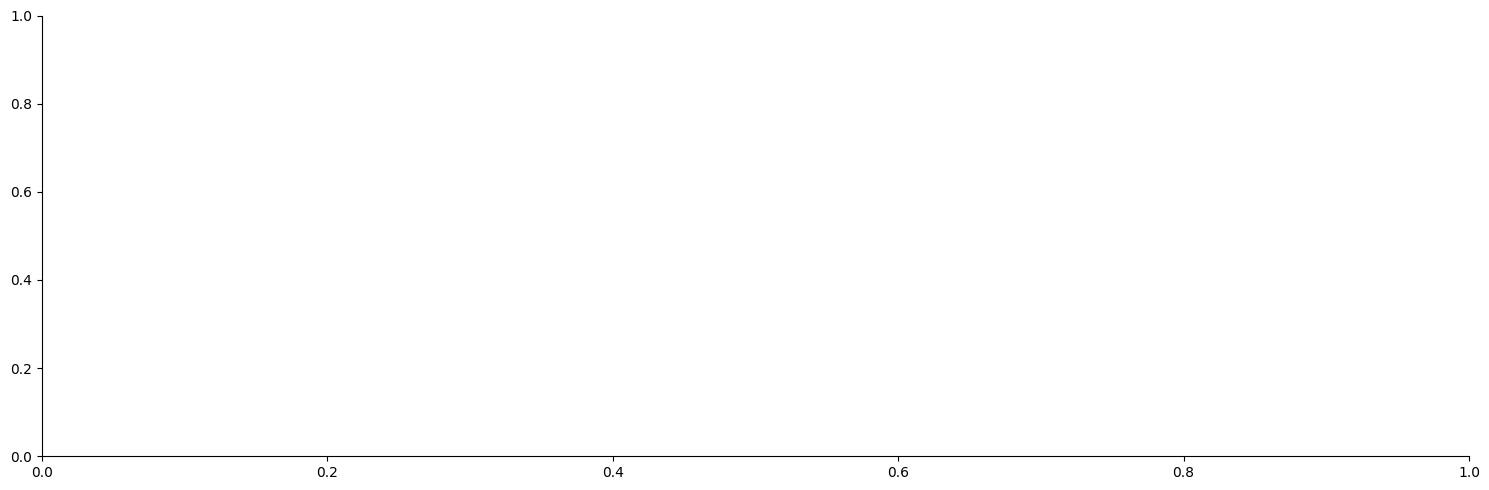

In [ ]:
g = sns.catplot(kind = 'bar', x = 'Artikel', y = 'Menge', data = produkt_liste
                , color = 'darkorchid', size = 5, aspect = 3)
g.set_xticklabels(rotation=90)

# Set the title and labels
plt.title('Verkaufte Menge pro Produkt', size = 20)
plt.xticks(size=13)
plt.xlabel('Jahr', size=15)
plt.ylabel('Menge', size=15)
plt.show

Verkaufte Menge letzte 12 Monate

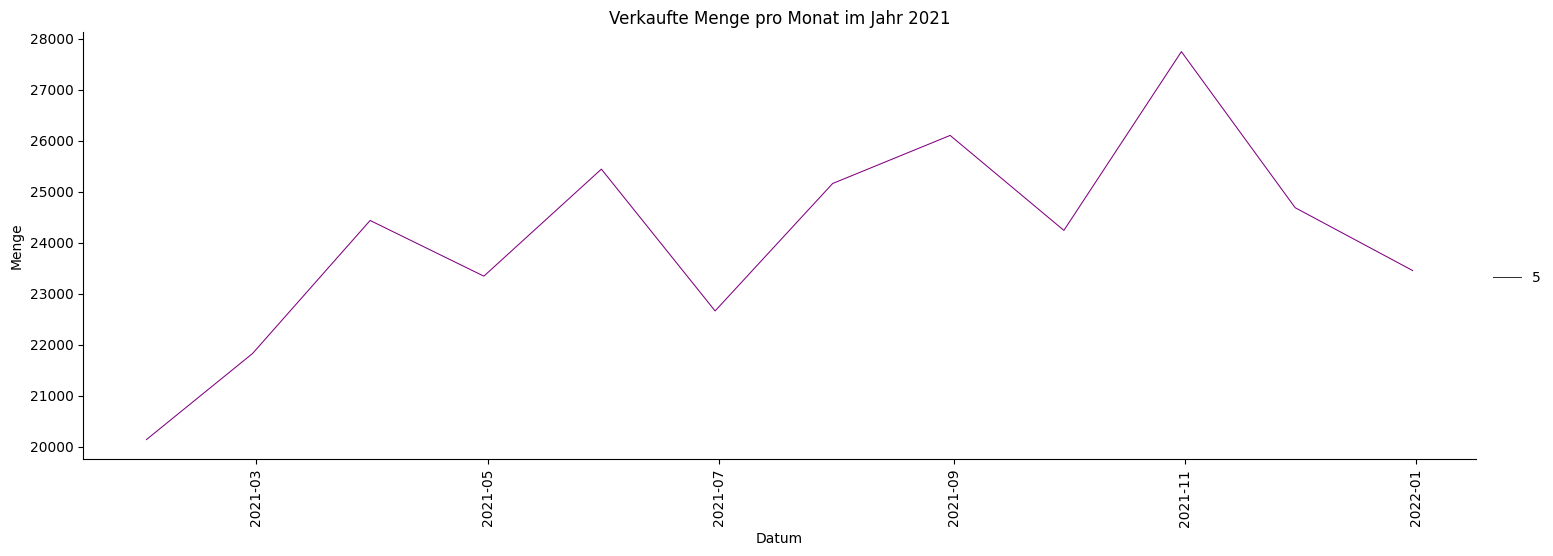

In [ ]:
# Datum zu Datetiem 
data['Datum'] = pd.to_datetime(data['Datum'])

# Nur Daten aus dem Jahr 2021 auswählen
data_2021 = data[(data["Datum"] >= "2021-01-01") & (data['Datum'] <= "2021-12-31")]

# Datum als Index festlegen
data_2021.set_index('Datum', inplace=True)

# Resample and sum the 'Menge' column monthly
menge_2021 = data_2021.resample('M')['Menge'].sum().reset_index()

# Plotten der Daten
menge_2021_plt = sns.relplot(kind='line', x='Datum', y='Menge', data=menge_2021, color='purple', size = 5, aspect = 3, linewidth = 5)
plt.xticks(rotation=90)
plt.title('Verkaufte Menge pro Monat im Jahr 2021')
plt.show()


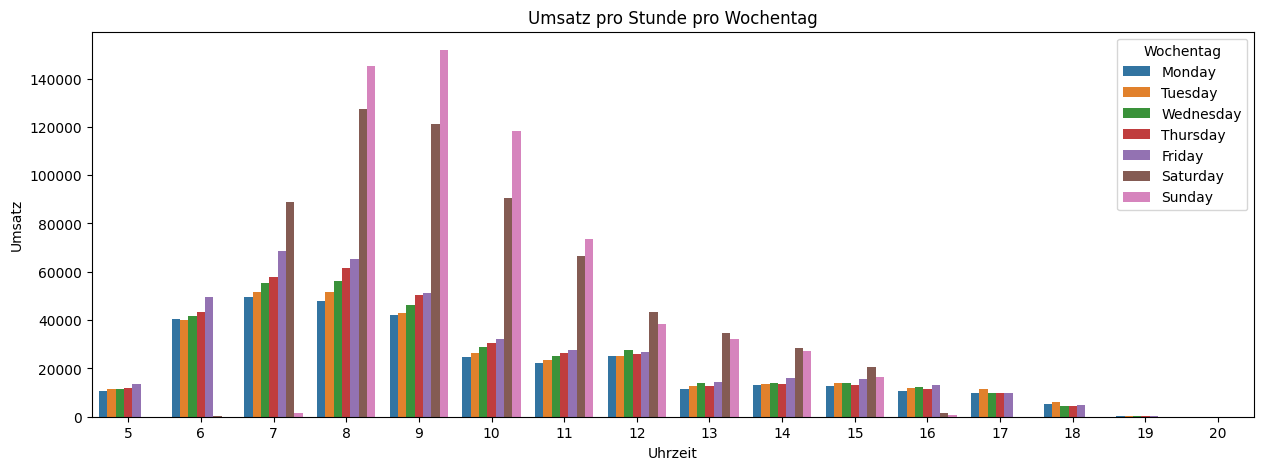

In [ ]:
# Erstellen eines Plots mit Uhrzeit und Umsatz

# Gruppieren der Daten nach Uhrzeit und Wochentag und berechnung des Durchschnittlichen Umsatzes
avg_umsatz = data.groupby(["Stunde", "Wochentag"])["Umsatz"].sum().reset_index()

#Erstellen des Plots
plt.figure(figsize = (15,5))
ax = sns.barplot(data=avg_umsatz, x="Stunde", y="Umsatz", hue="Wochentag")

ax.set_xlabel("Uhrzeit")
ax.set_ylabel("Umsatz")
ax.set_title("Umsatz pro Stunde pro Wochentag")
ax.legend(title = "Wochentag", loc = "upper right")


# Export des Graphen
plt.savefig("Umsatz pro Stunde pro Wochentag.png", dpi = 300, bbox_inches = "tight")

plt.show()

Wichtige Punkte: 
- Sonntag 7 Uhr dip, weil öffnen erst um 8 
- Spikes am Wochenende
- Später im verlauf der Woche 
- Schließen Sonntags um 12 --> Verkaufen viel nach 12 --> Andere öffnungszeiten früher

## 3.1 ABC-Analyse (Version 1)

Für die ABC-Analyse haben wir aktuell nur 14 Produkte aus dem gesamten Katalog. Deshalb kann es sein, dass die Analyse ungewöhnlich aussieht. 

In [ ]:
# Quelle: https://www.youtube.com/watch?v=g0W8e7na16k&t=287s
# Wir müssen den Datensatz zunächst umformen. Wir benötigen lediglich die unterschiedlichen Artikel (inkl. Menge & Umsatz pro Artikel)
dataABC = data.groupby(['Artikel']).agg(Menge=('Menge',np.sum),Umsatz=('Umsatz',np.sum)).reset_index()


In [ ]:
# Datensatz
dataABC.head()

,Artikel,Menge,Umsatz
0,BT Nussgipfel,63750.3,170888.1839
1,Buttergipfeli,380642.5,510542.0167
2,Butterzopf mittel,62808.0,394777.3602
3,Crèmeschnitten,70883.0,240532.9746
4,Erdbeertörtli,26792.0,112765.2629


C:\Users\marin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\abc_analysis\abc_analysis.py:163: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = pd.Series([0]).append(y)
C:\Users\marin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\abc_analysis\abc_analysis.py:164: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = pd.Series([0]).append(x)


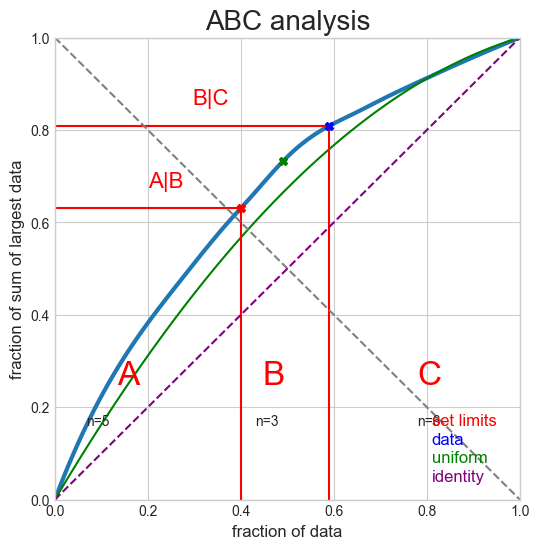

In [ ]:
abc_umsatz = abc_analysis(dataABC['Umsatz'], True)


C:\Users\marin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\abc_analysis\abc_analysis.py:163: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = pd.Series([0]).append(y)
C:\Users\marin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\abc_analysis\abc_analysis.py:164: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = pd.Series([0]).append(x)


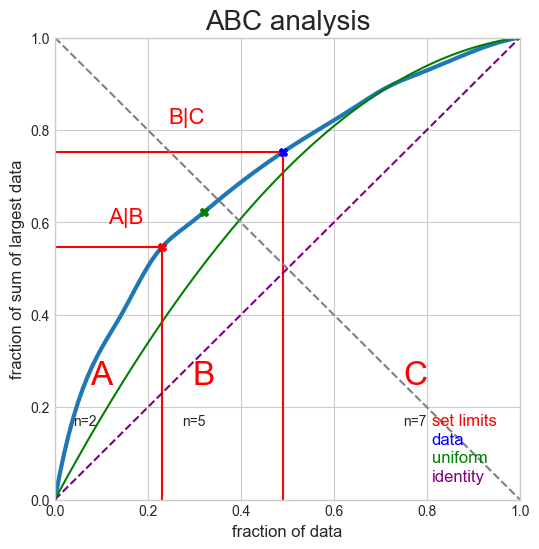

In [ ]:
# abc_menge = abc_analysis(dataABC['Menge'], True)
abc_umsatz = abc_analysis(dataABC['Menge'], True, )

In [ ]:
# Nun wollen wir jeden Artikel kategorisieren

a_index = abc_umsatz['Aind']
b_index = abc_umsatz['Bind']
c_index = abc_umsatz['Cind']

# Neue Spalte im Datensatz mit der Kategorisierung

cond_list = [dataABC.index.isin(a_index),
             dataABC.index.isin(b_index),
             dataABC.index.isin(c_index),
             ]

choice_list = ['A', 'B', 'C']

dataABC['Kategorie'] = np.select(cond_list, choice_list)
dataABC.sort_values(by=['Kategorie'])



,Artikel,Menge,Umsatz,Kategorie
1,Buttergipfeli,380642.5,510542.0167,A
8,Laugengi.mit SoBlu,186385.0,279846.3822,A
3,Crèmeschnitten,70883.0,240532.9746,B
7,Laugenbrötli,95742.5,95640.4229,B
9,Maisgipfel,179040.6,268815.9906,B
12,St. Gallerbürli,79097.0,110594.5840,B
13,Weggli normal,83048.0,91283.8801,B
0,BT Nussgipfel,63750.3,170888.1839,C
2,Butterzopf mittel,62808.0,394777.3602,C
4,Erdbeertörtli,26792.0,112765.2629,C


In [ ]:
dataABC

,Artikel,Menge,Umsatz,Kategorie
0,BT Nussgipfel,63750.3,170888.1839,C
1,Buttergipfeli,380642.5,510542.0167,A
2,Butterzopf mittel,62808.0,394777.3602,C
3,Crèmeschnitten,70883.0,240532.9746,B
4,Erdbeertörtli,26792.0,112765.2629,C
5,Hefe-Vanille-Weggli,39990.0,99684.7256,C
6,Il pollo forte gefüllt,42087.0,315529.6546,C
7,Laugenbrötli,95742.5,95640.4229,B
8,Laugengi.mit SoBlu,186385.0,279846.3822,A
9,Maisgipfel,179040.6,268815.9906,B


## 3.2 ABC-Analyse (Version 2)

In [ ]:
# Quelle: https://www.youtube.com/watch?v=V8Mz91gaXmQ&t=1075s
# Anmerkung: Resultat bzw. Klassifizierung ist nich gleich wie bei der Version 1. Deshalb habe ich beides mal drin gelassen.
#            Muss man noch angeschaut werden. 

# Wir müssen den Datensatz zunächst umformen. Wir benötigen lediglich die unterschiedlichen Artikel (inkl. Menge & Umsatz pro Artikel)
data_abc = data.groupby(['Artikel']).agg(Menge=('Menge',np.sum),Umsatz=('Umsatz',np.sum)).reset_index()

data_abc.head()

,Artikel,Menge,Umsatz
0,BT Nussgipfel,63750.3,170888.1839
1,Buttergipfeli,380642.5,510542.0167
2,Butterzopf mittel,62808.0,394777.3602
3,Crèmeschnitten,70883.0,240532.9746
4,Erdbeertörtli,26792.0,112765.2629


In [ ]:
# Nun klassifizieren wir die Produkte (A, B und C)

data_abc_analyse = inv.ABC(data_abc[['Artikel','Umsatz']])

In [ ]:
# Nun wurde der Datensatz mit der Spalte "Category" erweitert.  
data_abc_analyse

,Artikel,Umsatz,Percentage,comulative,Category
1,Buttergipfeli,510542.0167,0.168006,0.168006,A
2,Butterzopf mittel,394777.3602,0.129911,0.297917,A
6,Il pollo forte gefüllt,315529.6546,0.103833,0.401749,A
8,Laugengi.mit SoBlu,279846.3822,0.092090,0.493839,A
9,Maisgipfel,268815.9906,0.088460,0.582300,A
10,Quarkzöpfli,244785.0807,0.080552,0.662852,A
3,Crèmeschnitten,240532.9746,0.079153,0.742005,A
0,BT Nussgipfel,170888.1839,0.056235,0.798240,A
4,Erdbeertörtli,112765.2629,0.037108,0.835348,B
12,St. Gallerbürli,110594.5840,0.036394,0.871742,B


In [ ]:
# Count of categories
data_abc_analyse.Category.value_counts()

# Resultat: 8 Artikel sind A-Produkte, 4 Artikel sind B-Produkte und 2 Artikel sind C-Produkte.

A    8
B    4
C    2
Name: Category, dtype: int64

In [ ]:
# Nun wollen wir noch wissen wie viel Prozent der Verkauften Artikel die A,B und C-Produkte ausmachen. 

data_ABC_summary = data_abc_analyse.groupby('Category').agg(Count=('Artikel', np.count_nonzero),Prozentsatz=('Percentage',np.sum)).reset_index()
data_ABC_summary['Prozentsatz']=data_ABC_summary['Prozentsatz']*100
data_ABC_summary

# Resultat: Die A-Produkte machen 79.8% aus, die B-Produkte 14.02% und die C-Produkte 6.2%. 

,Category,Count,Prozentsatz
0,A,8,79.824000
1,B,4,14.024812
2,C,2,6.151188


<Axes: xlabel='Category', ylabel='count'>

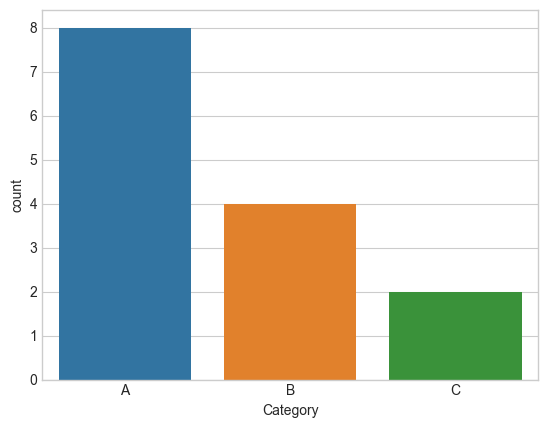

In [ ]:
# Visualisierung der ABC Analyse

sns.countplot(x='Category', data=data_abc_analyse, label=True)

<Axes: xlabel='Category', ylabel='Umsatz'>

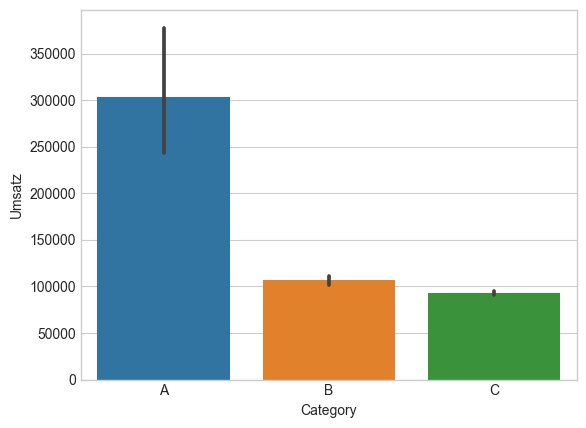

In [ ]:
# Visualisierung ABC Analyse nach volume of sales

sns.barplot(x='Category', y='Umsatz', data=data_abc_analyse)

## 3.3 ABC-Analyse Version 3 

### ABC-Analyse (Umsatz)

In [ ]:
# Datensatz erstellen
data_abc_manual = data.groupby(['Artikel']).agg(Menge=('Menge',np.sum),Umsatz=('Umsatz',np.sum)).reset_index()
data_abc_manual

,Artikel,Menge,Umsatz
0,BT Nussgipfel,63750.3,170888.1839
1,Buttergipfeli,380642.5,510542.0167
2,Butterzopf mittel,62808.0,394777.3602
3,Crèmeschnitten,70883.0,240532.9746
4,Erdbeertörtli,26792.0,112765.2629
5,Hefe-Vanille-Weggli,39990.0,99684.7256
6,Il pollo forte gefüllt,42087.0,315529.6546
7,Laugenbrötli,95742.5,95640.4229
8,Laugengi.mit SoBlu,186385.0,279846.3822
9,Maisgipfel,179040.6,268815.9906


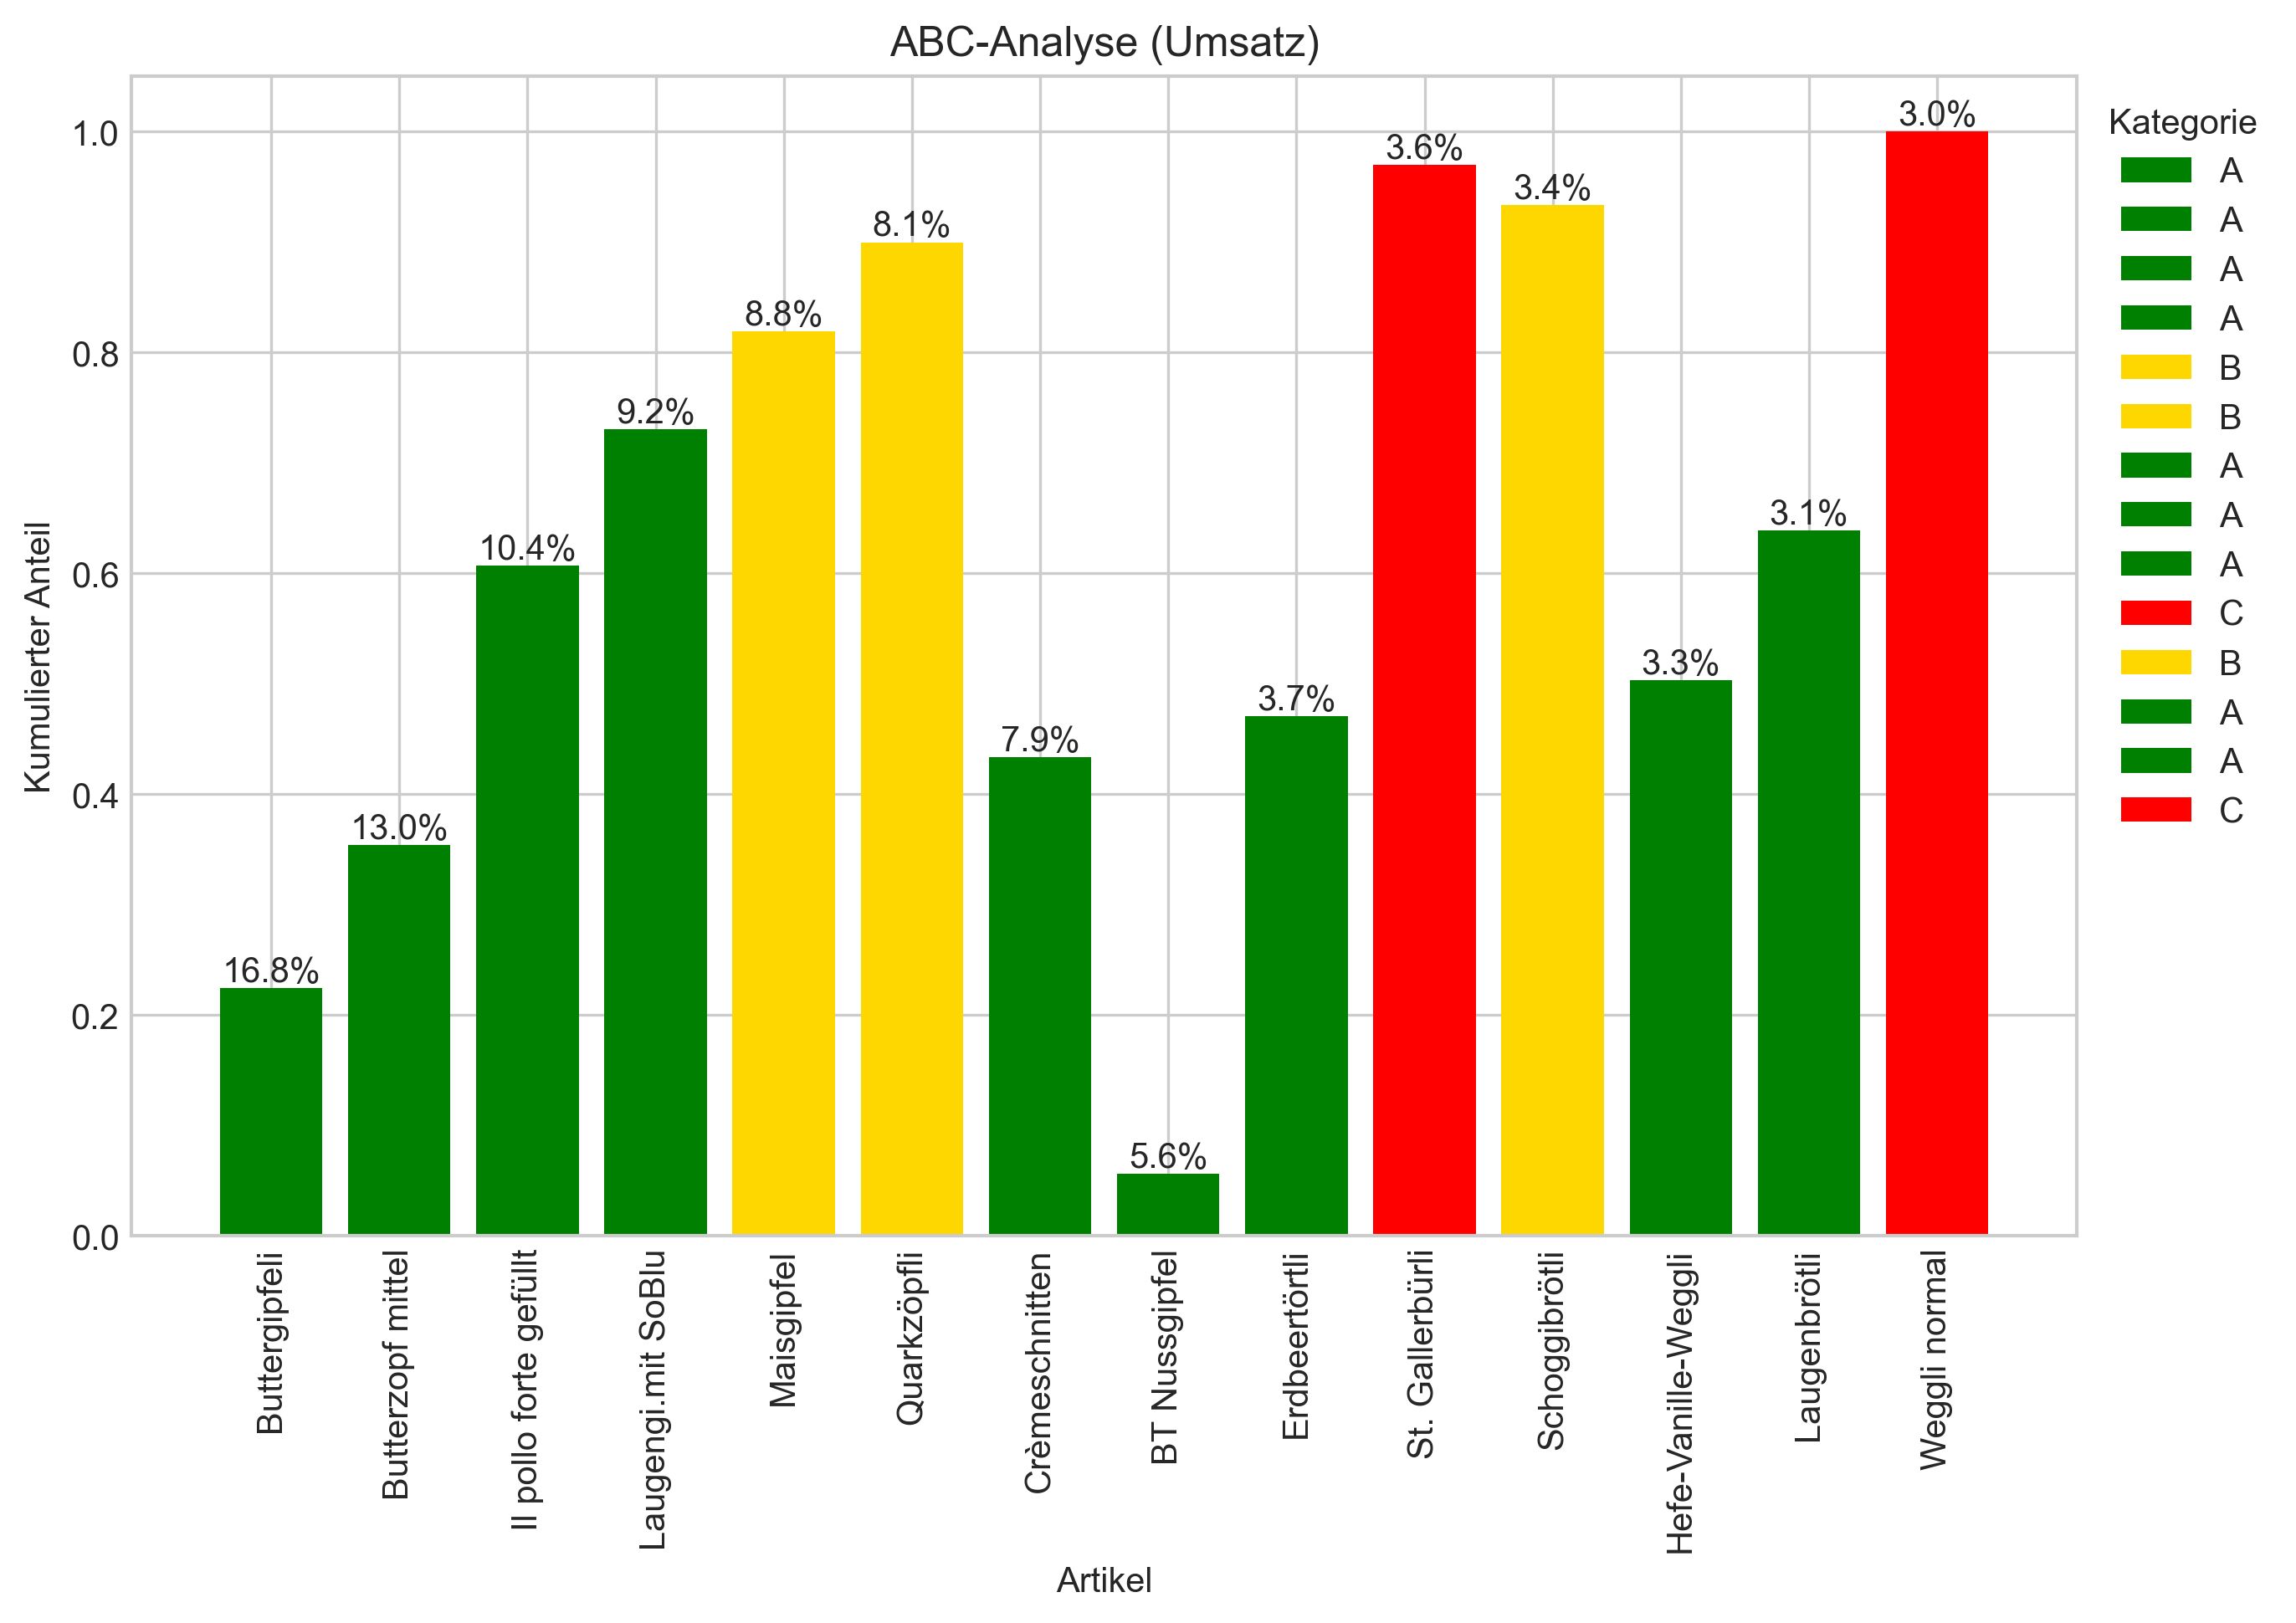

In [ ]:
# Calculate the cumulative value and percentage
data_abc_manual['Cumulative_Value'] = data_abc_manual['Umsatz'].cumsum()
total_value = data_abc_manual['Umsatz'].sum()
data_abc_manual['Cumulative_Percentage'] = (data_abc_manual['Cumulative_Value'] / total_value)
data_abc_manual['Percentage'] = data_abc_manual['Umsatz'] / total_value

# Define the ABC classification function
def abc_classification(percentage):
    if percentage <= 0.80:
        return 'A'
    elif percentage <= 0.95:
        return 'B'
    else:
        return 'C'

# Apply the ABC classification to the data
data_abc_manual['Category'] = data_abc_manual['Cumulative_Percentage'].apply(abc_classification)

# Sort the DataFrame by Umsatz in descending order
data_abc_manual = data_abc_manual.sort_values(by='Umsatz', ascending=False)

# Plot ABC-Analysis
fig, ax = plt.subplots(figsize=(10, 6), dpi = 300)
bars = ax.bar(data_abc_manual['Artikel'], data_abc_manual['Cumulative_Percentage'], 
              color=['green' if c == 'A' else 'gold' if c == 'B' else 'red' for c in data_abc_manual['Category']])
ax.set_ylabel('Kumulierter Anteil')
ax.set_xlabel('Artikel')
ax.set_title('ABC-Analyse (Umsatz)')
ax.legend(bars, data_abc_manual['Category'], title='Kategorie', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)

# Add percentage labels to the bars
for bar, pct in zip(bars, data_abc_manual['Percentage']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, '{:.1%}'.format(pct), ha='center', va='bottom', )


plt.savefig('ABC-Analyse (Umsatz)', dpi=500, bbox_inches='tight')
plt.show()

### ABC-Analyse (Menge)


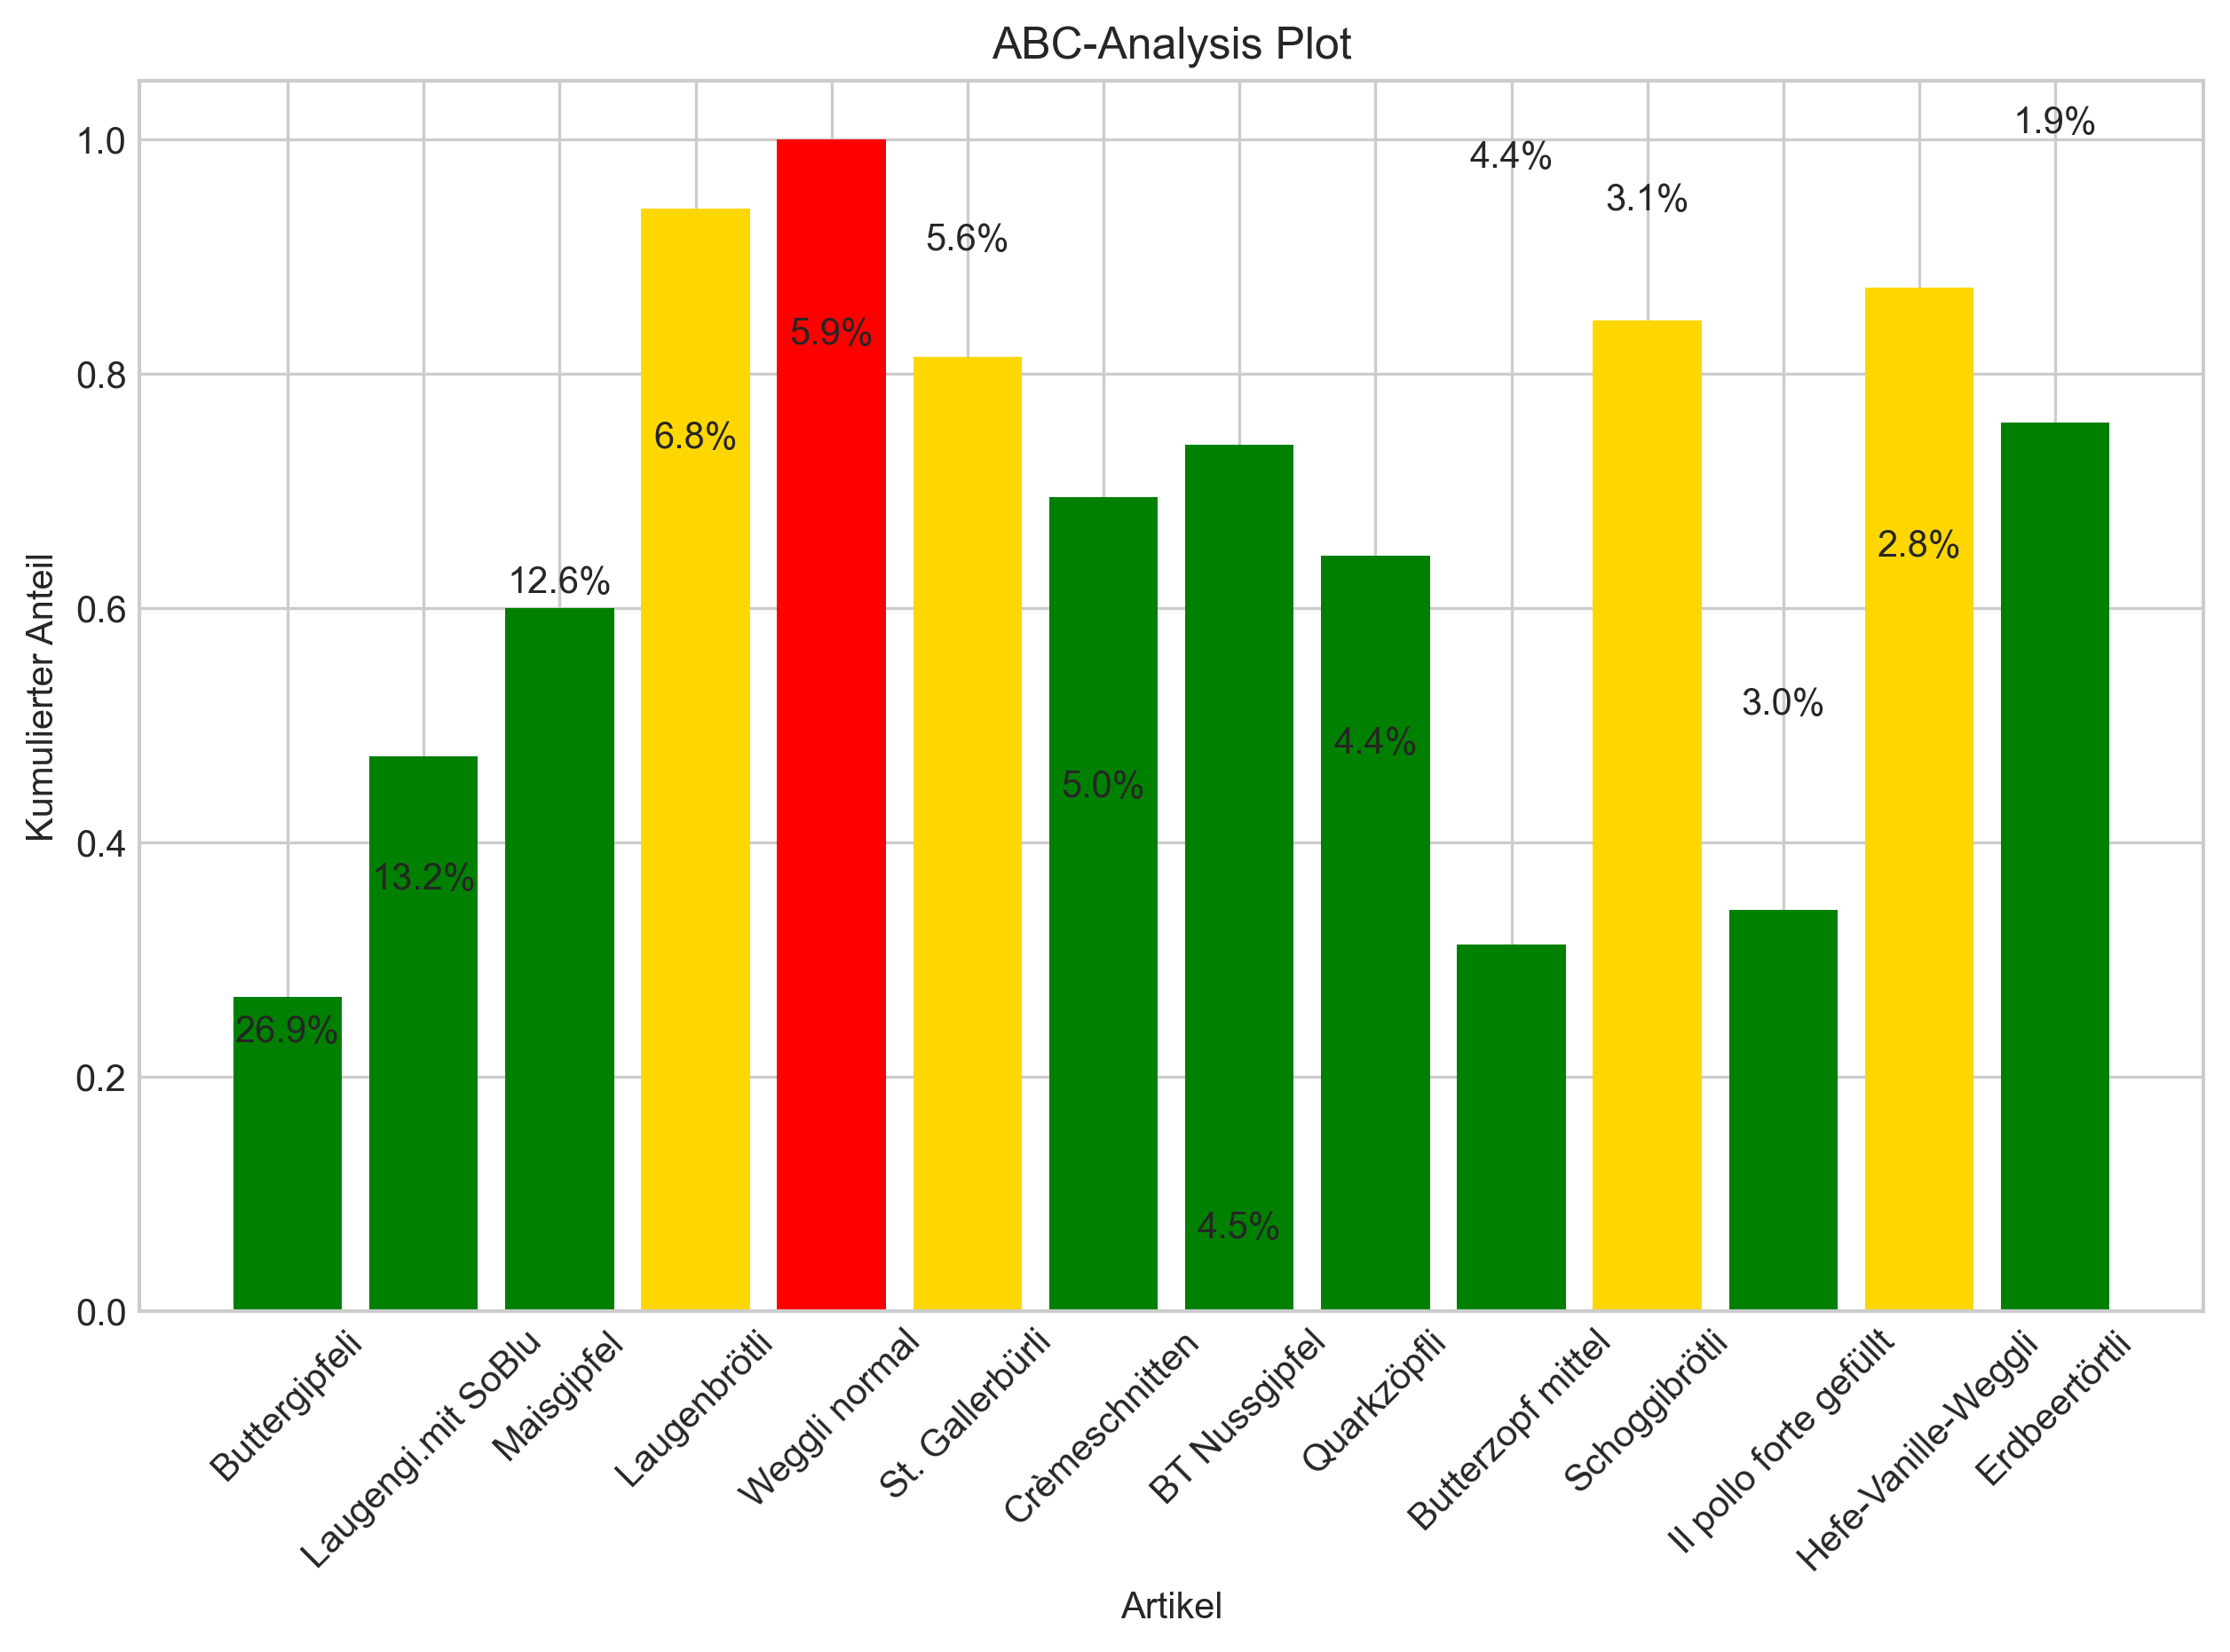

In [ ]:
# Calculate the cumulative value and percentage
data_abc_manual['Cumulative_Value'] = data_abc_manual['Menge'].cumsum()
total_value = data_abc_manual['Menge'].sum()
data_abc_manual['Cumulative_Percentage'] = (data_abc_manual['Cumulative_Value'] / total_value)
data_abc_manual['Percentage'] = data_abc_manual['Menge'] / total_value


# Define the ABC classification function
def abc_classification(percentage):
    if percentage <= 0.80:
        return 'A'
    elif percentage <= 0.95:
        return 'B'
    else:
        return 'C'

# Apply the ABC classification to the data
data_abc_manual['Category'] = data_abc_manual['Cumulative_Percentage'].apply(abc_classification)

# Sort the DataFrame by Menge in descending order
data_abc_manual = data_abc_manual.sort_values(by='Menge', ascending=False)

# Plot ABC-Analysis
fig, ax = plt.subplots(figsize=(10, 6), dpi = 300)
ax.bar(data_abc_manual['Artikel'], data_abc_manual['Cumulative_Percentage'], 
       color=['green' if c == 'A' else 'gold' if c == 'B' else 'red' for c in data_abc_manual['Category']])
ax.set_ylabel('Kumulierter Anteil')
ax.set_xlabel('Artikel')
ax.set_title('ABC-Analysis Plot')
plt.xticks(rotation=45)

# Add percentage labels to the bars
for bar, pct in zip(bars, data_abc_manual['Percentage']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, '{:.1%}'.format(pct), ha='center', va='bottom', )


plt.show()

# 4. High-Level Analyse 

In [ ]:
# Hier möchten wir sehen, wie sich der Umsatz/Verkaufsmenge im Verlauf der Jahre entwickelt hat. 

# Zunächst wird der Datensatz umstrukturiert. Wir möchten den Umsatz pro Tag. 
data_2 = data.groupby(['Datum']).agg(Umsatz=('Umsatz',np.sum)).reset_index()
data_2

,Datum,Umsatz
0,2016-01-03,1175.5000
1,2016-01-04,795.1618
2,2016-01-05,512.7082
3,2016-01-06,654.0417
4,2016-01-07,751.9000
...,...,...
2173,2022-02-07,1258.6000
2174,2022-02-08,1417.0500
2175,2022-02-09,1554.7000
2176,2022-02-10,1529.1000


### Umsatz & Menge pro Tag ####

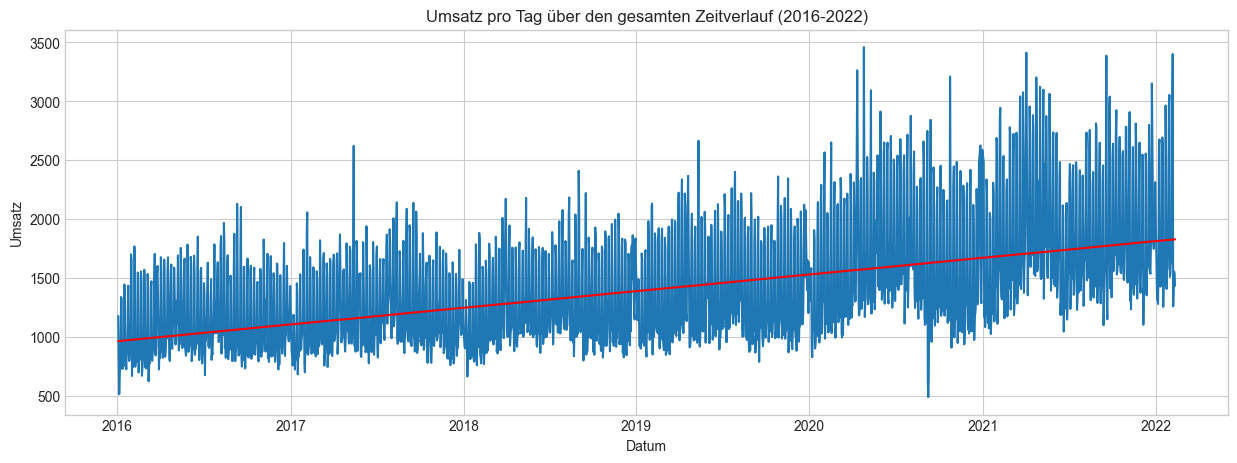

In [ ]:
# Visualisierung: Umsatz pro Tag

plt.figure(figsize=(15,5))
plt.plot(data_2['Datum'], data_2['Umsatz'])
plt.xlabel('Datum')
plt.ylabel('Umsatz')
plt.title('Umsatz pro Tag über den gesamten Zeitverlauf (2016-2022)')

# Trendlinie
z = np.polyfit(data_2.index, data_2['Umsatz'], 1)
p = np.poly1d(z)
plt.plot(data_2['Datum'], p(data_2.index), label='Trendline', color='red')

plt.show()


In [ ]:
# Nun möchten wir die Menge pro Tag. 

data_2_menge = data.groupby(['Datum']).agg(Menge=('Menge',np.sum)).reset_index()
data_2_menge

,Datum,Menge
0,2016-01-03,650.0
1,2016-01-04,427.0
2,2016-01-05,306.0
3,2016-01-06,314.0
4,2016-01-07,383.0
...,...,...
2173,2022-02-07,541.0
2174,2022-02-08,571.0
2175,2022-02-09,610.0
2176,2022-02-10,633.0


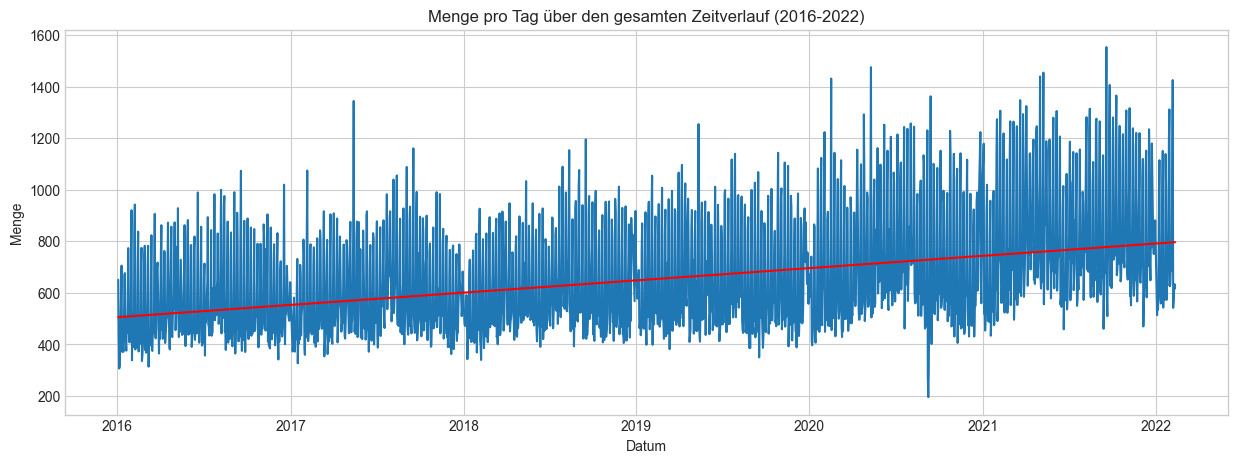

In [ ]:
# Visualisierung: Menge pro Tag

plt.figure(figsize=(15,5))
plt.plot(data_2_menge['Datum'], data_2_menge['Menge'])
plt.xlabel('Datum')
plt.ylabel('Menge')
plt.title('Menge pro Tag über den gesamten Zeitverlauf (2016-2022)')

z = np.polyfit(data_2_menge.index, data_2_menge['Menge'], 1)
p = np.poly1d(z)
plt.plot(data_2_menge['Datum'], p(data_2.index), label='Trendline', color='red')

plt.show()


In [ ]:
# Für eine bessere Visualisierung wird nun der Umsatz pro Monat aggregiert. 
# Dafür muss der Datensatz entsprechend umgeformt werden.

data_3 = data.groupby(['Datum']).agg(Umsatz=('Umsatz',np.sum)).reset_index()
data_3['Datum'] = pd.to_datetime(data_3["Datum"])  
data_3.set_index('Datum', inplace = True)
data_3_M = data_3.resample('M').sum()
data_3_M 


,Umsatz
Datum,
2016-01-31,28538.4360
2016-02-29,29943.5983
2016-03-31,28968.3602
2016-04-30,35140.1324
2016-05-31,34087.0717
...,...
2021-10-31,61711.0351
2021-11-30,54977.6908
2021-12-31,54113.6879


### Umsatz & Menge pro Monat ###

<Axes: xlabel='Datum'>

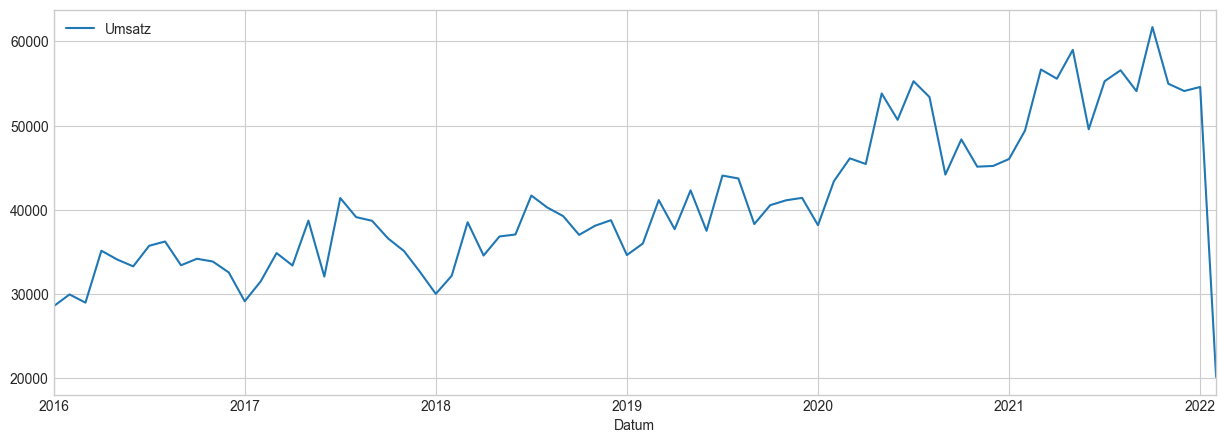

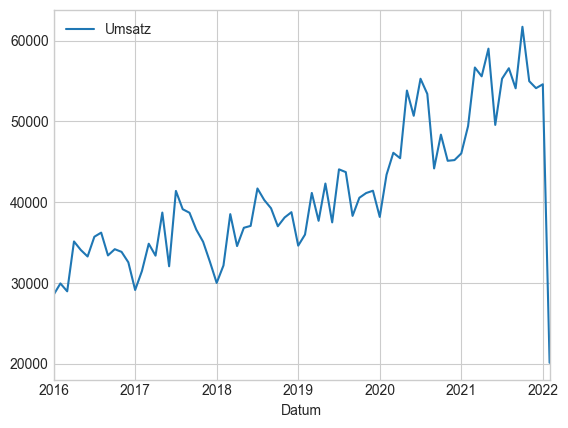

In [ ]:
# Visualisierung: Umsatz pro Monat

%matplotlib inline

data_3_M.plot(grid='on', figsize=(15,5))

from datetime import datetime
start_date = datetime(2016, 1, 31)
end_date = datetime(2022, 2, 28)
data_3_M[(start_date <= data_3_M.index) & (data_3_M.index <= end_date)].plot(grid='on')

In [ ]:
# Nun wird die verkaufte Menge pro Monat aggregiert. 

data_3_menge = data.groupby(['Datum']).agg(Menge=('Menge',np.sum)).reset_index()
data_3_menge['Datum'] = pd.to_datetime(data_3_menge["Datum"])  
data_3_menge.set_index('Datum', inplace = True)
data_3_M_menge = data_3_menge.resample('M').sum()
data_3_M_menge


,Menge
Datum,
2016-01-31,14649.0
2016-02-29,15167.0
2016-03-31,14380.0
2016-04-30,17237.0
2016-05-31,16743.0
...,...
2021-10-31,27747.0
2021-11-30,24687.0
2021-12-31,23454.0


<Axes: xlabel='Datum'>

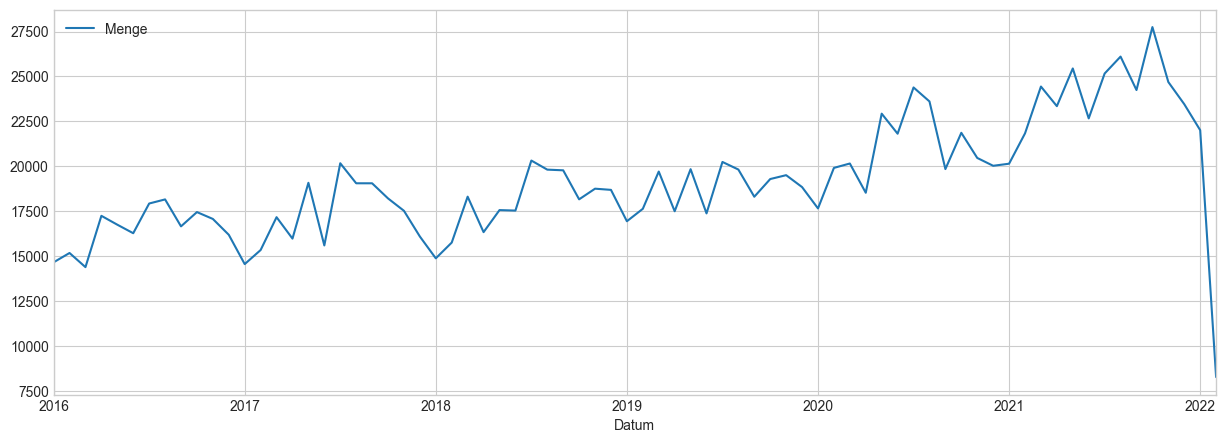

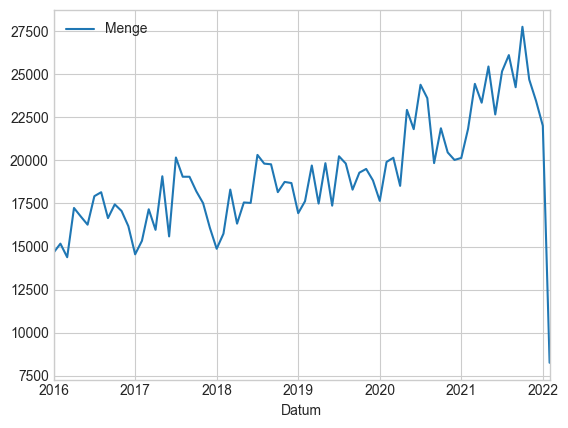

In [ ]:
# Visualisierung: Menge pro Monat

%matplotlib inline

data_3_M_menge.plot(grid='on', figsize=(15,5))

from datetime import datetime
start_date = datetime(2016, 1, 31)
end_date = datetime(2022, 2, 28)
data_3_M_menge[(start_date <= data_3_M_menge.index) & (data_3_M_menge.index <= end_date)].plot(grid='on')

<Axes: xlabel='Datum'>

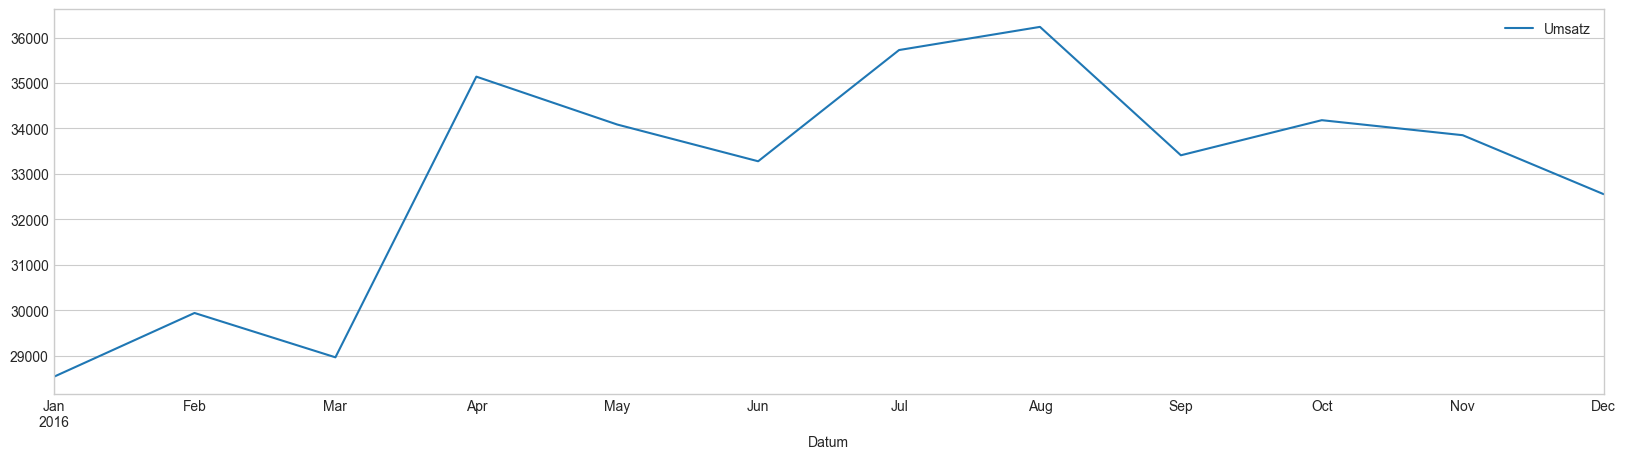

In [ ]:
# Umsatz pro Monat für ein bestimmtes Jahr (hier: 2016)
%matplotlib inline
# data_3_M.plot(grid='on', figsize=(20,5))
from datetime import datetime
start_date = datetime(2016, 1, 31)
end_date = datetime(2016, 12, 31)

data_3_M[(start_date <= data_3_M.index) & (data_3_M.index <= end_date)].plot(grid='on', figsize=(20,5))

### Umsatz & Menge pro Woche ###

In [ ]:
# Nun wird der Umsatz pro Woche aggregiert betrachtet.

data_4 = data.groupby(['Datum']).agg(Umsatz=('Umsatz',np.sum)).reset_index()
data_4['Datum'] = pd.to_datetime(data_4["Datum"])  
data_4.set_index('Datum', inplace = True)
data_4_W = data_4.resample('W').sum()
data_4_W 


,Umsatz
Datum,
2016-01-03,1175.5000
2016-01-10,6278.8077
2016-01-17,6518.9359
2016-01-24,6801.5321
2016-01-31,7763.6603
...,...
2022-01-16,13170.1200
2022-01-23,12956.9781
2022-01-30,14365.1982


<Axes: xlabel='Datum'>

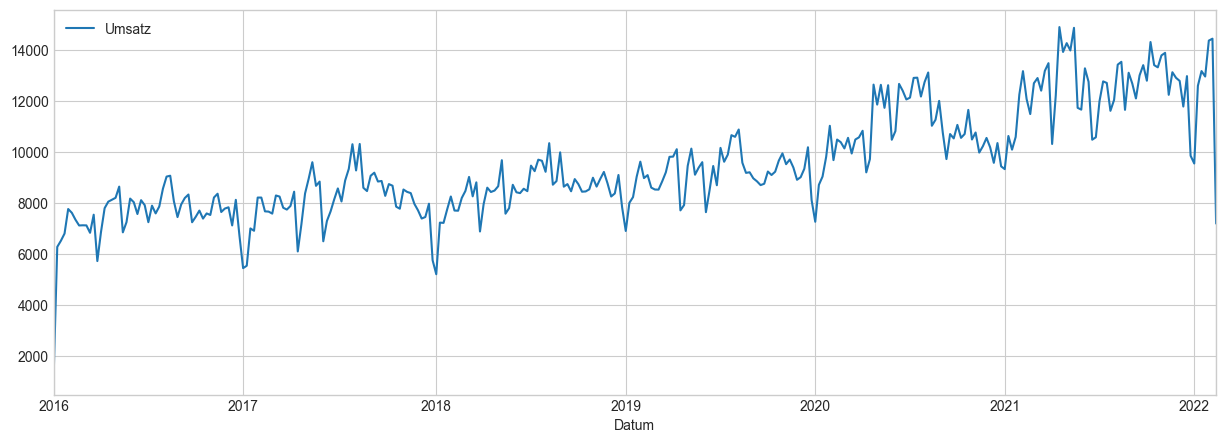

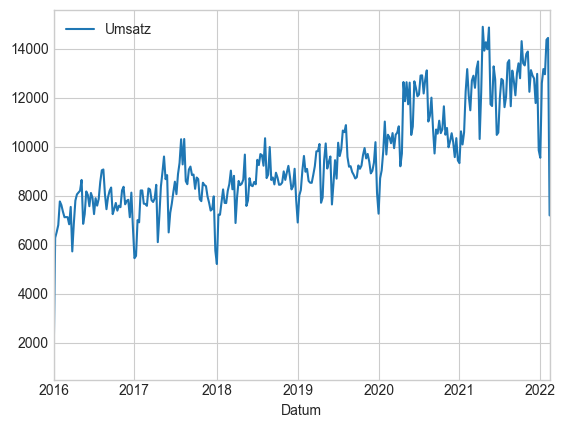

In [ ]:
# Visualisierung: Umsatz pro Woche

%matplotlib inline

data_4_W.plot(grid='on', figsize=(15,5))

from datetime import datetime
start_date = datetime(2016, 1, 3)
end_date = datetime(2022, 2, 13)
data_4_W[(start_date <= data_4_W.index) & (data_4_W.index <= end_date)].plot(grid='on')

In [ ]:
# Nun wird die verkaufte Menge pro Woche aggregiert betrachtet.

data_4_menge = data.groupby(['Datum']).agg(Menge=('Menge',np.sum)).reset_index()
data_4_menge['Datum'] = pd.to_datetime(data_4_menge["Datum"])  
data_4_menge.set_index('Datum', inplace = True)
data_4_W_menge = data_4_menge.resample('W').sum()
data_4_W_menge

,Menge
Datum,
2016-01-03,650.0
2016-01-10,3202.0
2016-01-17,3328.0
2016-01-24,3488.0
2016-01-31,3981.0
...,...
2022-01-16,5279.0
2022-01-23,5195.0
2022-01-30,5908.0


<Axes: xlabel='Datum'>

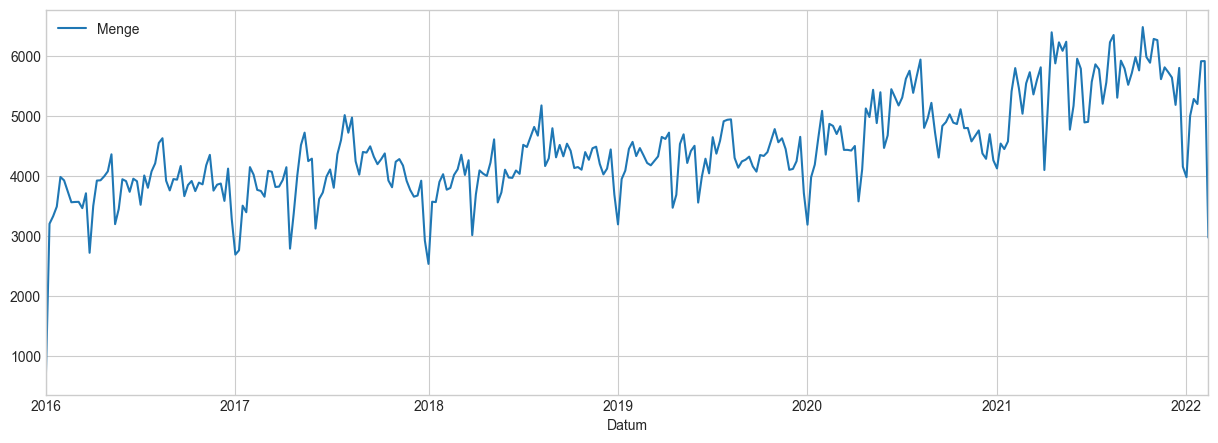

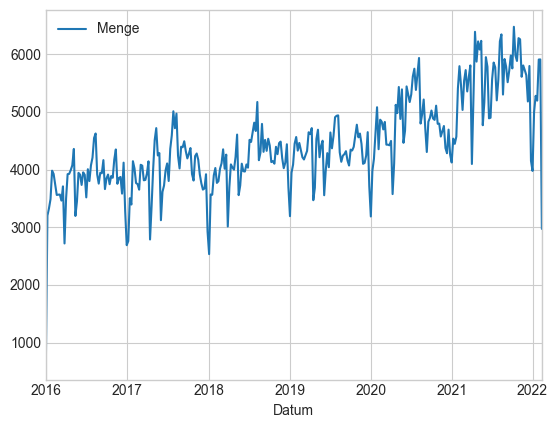

In [ ]:
# Visualisierung: Menge pro Woche
%matplotlib inline

data_4_W_menge.plot(grid='on', figsize=(15,5))

from datetime import datetime
start_date = datetime(2016, 1, 3)
end_date = datetime(2022, 2, 13)
data_4_W_menge[(start_date <= data_4_W_menge.index) & (data_4_W_menge.index <= end_date)].plot(grid='on')


### Menge pro Jahr ###

In [ ]:
data.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat,Ferienzeit TG,Geschmack,Fastenzeit,Ramadan
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,2016-01-03,Sunday,1,,süss,0,0
1,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,Sunday,1,,süss,0,0
2,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:23:41,8,2016-01-03,Sunday,1,,süss,0,0
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:26:53,8,2016-01-03,Sunday,1,,süss,0,0
4,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:39:05,8,2016-01-03,Sunday,1,,süss,0,0


In [ ]:
data.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            719175, 719176, 719177, 719178, 719179, 719180, 719181, 719182,
            719183, 719184],
           dtype='int64', length=719185)

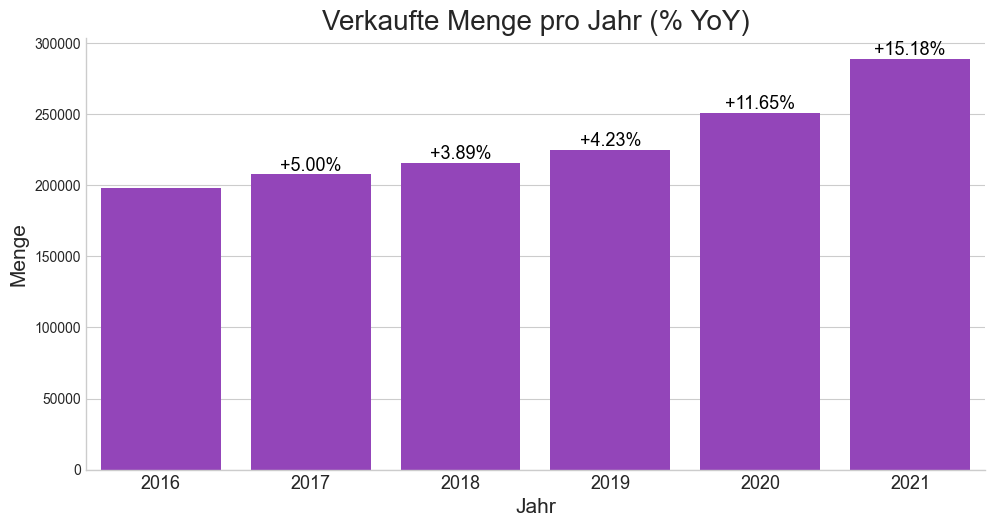

In [ ]:
import numpy as np

# Balkendiagramm für die Menge pro Jahr
data_Jahr = data.groupby(data.Datum.dt.year).agg(Menge=('Menge', np.sum)).reset_index()
data_Jahr = data_Jahr[data_Jahr['Datum'] != 2022]

# Calculate the year-over-year percentage change
data_Jahr['YoY'] = data_Jahr['Menge'].pct_change() * 100

plt_jahr = sns.catplot(kind='bar', data=data_Jahr, x='Datum', y='Menge', 
                       height=5, aspect=2, color='darkorchid')

# Set the title and labels
plt.title('Verkaufte Menge pro Jahr (% YoY)', size=20)
plt.xticks(size=13)
plt.xlabel('Jahr', size=15)
plt.ylabel('Menge', size=15)

# Annotate the bars with YoY percentage change
ax = plt.gca()
for p, yoy in zip(ax.patches, data_Jahr['YoY']):
    if not np.isnan(yoy):
        ax.annotate(f'{yoy:+.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', size=13, color='black')

# Graph exportieren
plt.savefig('Verkaufte Menge pro Jahr (% YoY).png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
data_Jahr

,Datum,Menge,YoY
0,2016,197856.0,NaN
1,2017,207740.6,4.995856
2,2018,215814.0,3.886289
3,2019,224936.0,4.226788
4,2020,251135.8,11.647669
5,2021,289246.5,15.175335


# 5. Weitere Analysen #

### Analyse des Preisverlaufs ###
Marinela -

In [ ]:
# Stückpreis berechnet
data["Stückpreis"] = pd.to_numeric(data["Umsatz"] / data["Menge"]).apply(lambda x: '{:.2f}'.format(x))

# Sortieren nach Stückpreis
data_preis = data.sort_values(by='Stückpreis', ascending=True)

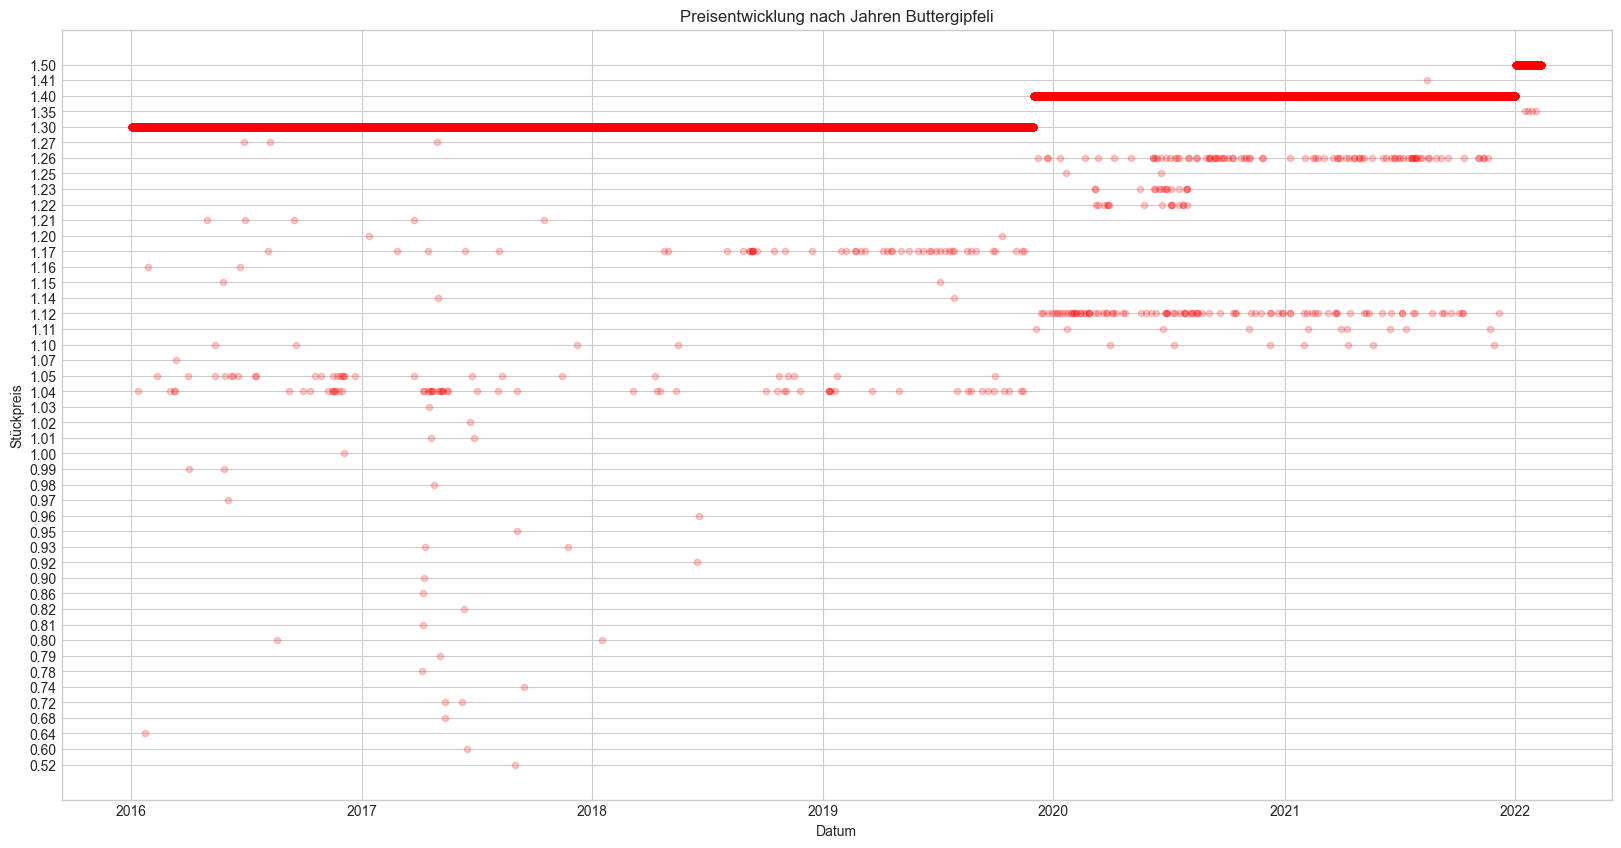

In [ ]:
# Plot mit Preisentwicklung von BT Nussgipfeln über die Jahre
data_preis.loc[data["Artikel"] == "Buttergipfeli"].plot(kind='scatter', x='Datum', y='Stückpreis', alpha=0.2, figsize=(20,10), color='red', title='Preisentwicklung nach Jahren Buttergipfeli')

# Exportieren des Plots als PNG
plt.savefig('Preisentwicklung nach Jahren Buttergipfeli.png', dpi=500, bbox_inches='tight')

C:\Users\marin\AppData\Local\Temp\ipykernel_16372\3839762170.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maisgipfel_data['Datum'] = pd.to_datetime(maisgipfel_data['Datum'])


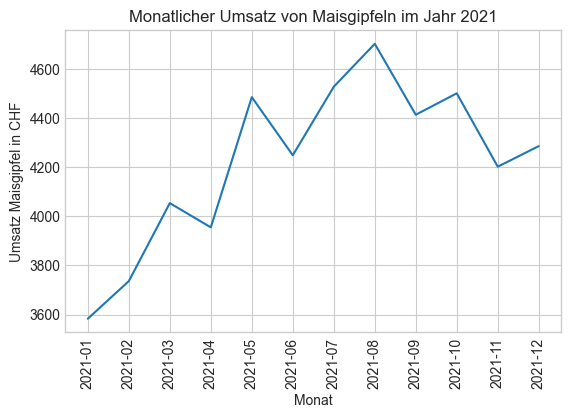

In [ ]:
# Umsatz Maisgipfel pro Monat

data['Datum'] = pd.to_datetime(data['Datum'])
jahr = 2021

maisgipfel_data = data[(data['Artikel'] == 'Maisgipfel') & (data['Datum'].dt.year == jahr)]
maisgipfel_data['Datum'] = pd.to_datetime(maisgipfel_data['Datum'])

maisgipfel_monthly_revenue = maisgipfel_data.groupby(maisgipfel_data['Datum'].dt.strftime('%Y-%m'))['Umsatz'].sum()
plt.plot(maisgipfel_monthly_revenue.index, maisgipfel_monthly_revenue.values)
plt.xlabel('Monat')
plt.ylabel('Umsatz Maisgipfel in CHF')
plt.title(f'Monatlicher Umsatz von Maisgipfeln im Jahr {jahr}')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)
plt.show()

C:\Users\marin\AppData\Local\Temp\ipykernel_16372\586947192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maisgipfel_data['Datum'] = pd.to_datetime(maisgipfel_data['Datum'])


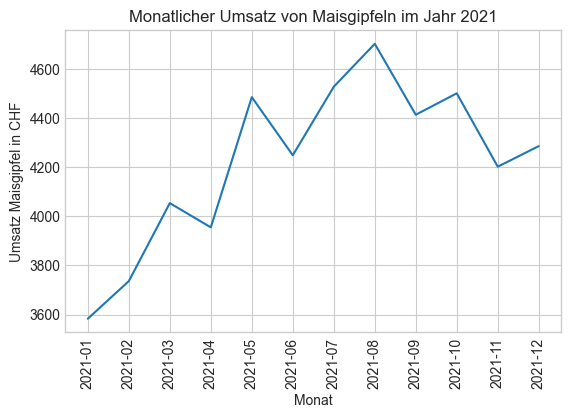

In [ ]:
# Umsatz Maisgipfel pro Monat

data['Datum'] = pd.to_datetime(data['Datum'])
jahr = 2021

maisgipfel_data = data[(data['Artikel'] == 'Maisgipfel') & (data['Datum'].dt.year == jahr)]
maisgipfel_data['Datum'] = pd.to_datetime(maisgipfel_data['Datum'])

maisgipfel_monthly_revenue = maisgipfel_data.groupby(maisgipfel_data['Datum'].dt.strftime('%Y-%m'))['Umsatz'].sum()
plt.plot(maisgipfel_monthly_revenue.index, maisgipfel_monthly_revenue.values)
plt.xlabel('Monat')
plt.ylabel('Umsatz Maisgipfel in CHF')
plt.title(f'Monatlicher Umsatz von Maisgipfeln im Jahr {jahr}')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)
plt.show()


C:\Users\marin\AppData\Local\Temp\ipykernel_16372\840693886.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buttergipfel_data['Datum'] = pd.to_datetime(buttergipfel_data['Datum'])


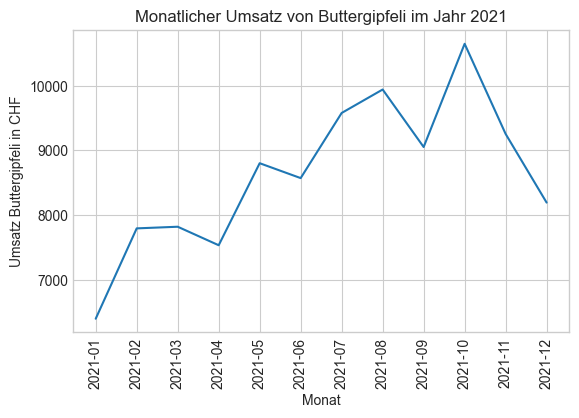

In [ ]:
# Umsatz Buttergipfeli pro Monat

data['Datum'] = pd.to_datetime(data['Datum'])
jahr = 2021

buttergipfel_data = data[(data['Artikel'] == 'Buttergipfeli') & (data['Datum'].dt.year == jahr)]
buttergipfel_data['Datum'] = pd.to_datetime(buttergipfel_data['Datum'])

buttergipfel_monthly_revenue = buttergipfel_data.groupby(buttergipfel_data['Datum'].dt.strftime('%Y-%m'))['Umsatz'].sum()
plt.plot(buttergipfel_monthly_revenue.index, buttergipfel_monthly_revenue.values)
plt.xlabel('Monat')
plt.ylabel('Umsatz Buttergipfeli in CHF')
plt.title(f'Monatlicher Umsatz von Buttergipfeli im Jahr {jahr}')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)
plt.show()

C:\Users\marin\AppData\Local\Temp\ipykernel_16372\3240120261.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laugengipfelimitsonnenblumen_data['Datum'] = pd.to_datetime(laugengipfelimitsonnenblumen_data['Datum'])


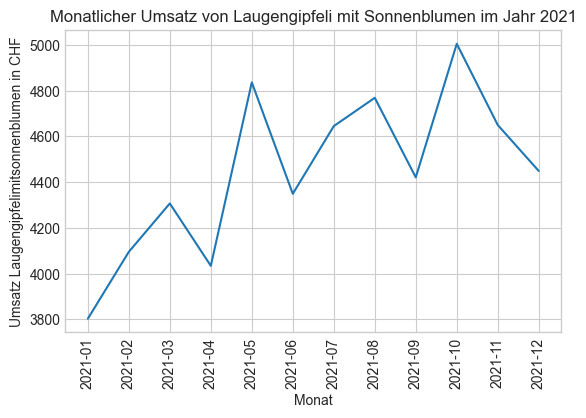

In [ ]:
# Umsatz Laugengipfeli mit Sonnenblumen pro Monat

data['Datum'] = pd.to_datetime(data['Datum'])
jahr = 2021

laugengipfelimitsonnenblumen_data = data[(data['Artikel'] == 'Laugengi.mit SoBlu') & (data['Datum'].dt.year == jahr)]
laugengipfelimitsonnenblumen_data['Datum'] = pd.to_datetime(laugengipfelimitsonnenblumen_data['Datum'])

laugengipfelimitsonnenblumen_monthly_revenue = laugengipfelimitsonnenblumen_data.groupby(laugengipfelimitsonnenblumen_data['Datum'].dt.strftime('%Y-%m'))['Umsatz'].sum()
plt.plot(laugengipfelimitsonnenblumen_monthly_revenue.index, laugengipfelimitsonnenblumen_monthly_revenue.values)
plt.xlabel('Monat')
plt.ylabel('Umsatz Laugengipfelimitsonnenblumen in CHF')
plt.title(f'Monatlicher Umsatz von Laugengipfeli mit Sonnenblumen im Jahr {jahr}')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)
plt.show()

C:\Users\marin\AppData\Local\Temp\ipykernel_16372\3462990816.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laugenbroetli_data['Datum'] = pd.to_datetime(laugenbroetli_data['Datum'])


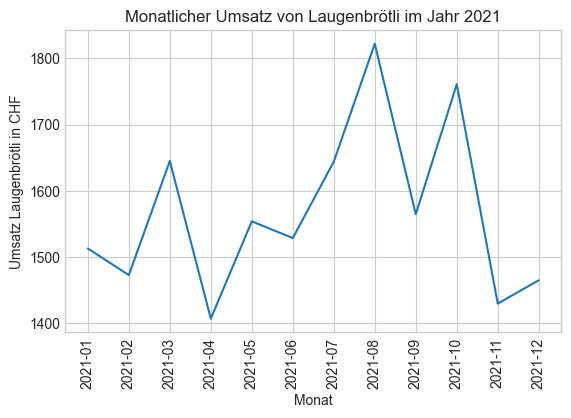

In [ ]:
# Umsatz Laugenbrötli pro Monat

data['Datum'] = pd.to_datetime(data['Datum'])
jahr = 2021

laugenbroetli_data = data[(data['Artikel'] == 'Laugenbrötli') & (data['Datum'].dt.year == jahr)]
laugenbroetli_data['Datum'] = pd.to_datetime(laugenbroetli_data['Datum'])

laugenbroetli_monthly_revenue = laugenbroetli_data.groupby(laugenbroetli_data['Datum'].dt.strftime('%Y-%m'))['Umsatz'].sum()
plt.plot(laugenbroetli_monthly_revenue.index, laugenbroetli_monthly_revenue.values)
plt.xlabel('Monat')
plt.ylabel('Umsatz Laugenbrötli in CHF')
plt.title(f'Monatlicher Umsatz von Laugenbrötli im Jahr {jahr}')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)
plt.show()

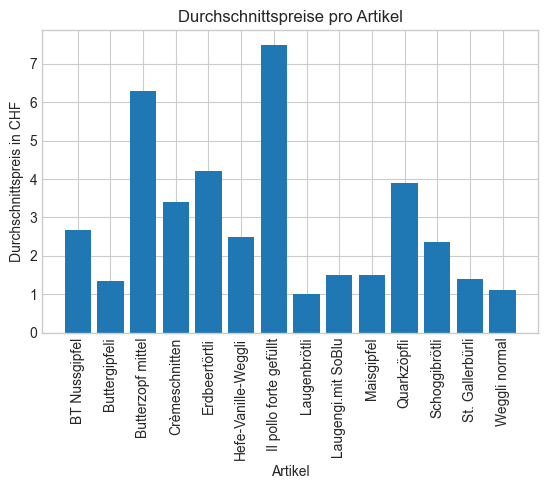

Artikel
BT Nussgipfel             2.680586
Buttergipfeli             1.341264
Butterzopf mittel         6.285463
Crèmeschnitten            3.393380
Erdbeertörtli             4.208915
Hefe-Vanille-Weggli       2.492741
Il pollo forte gefüllt    7.497081
Laugenbrötli              0.998934
Laugengi.mit SoBlu        1.501443
Maisgipfel                1.501425
Quarkzöpfli               3.890047
Schoggibrötli             2.354931
St. Gallerbürli           1.398215
Weggli normal             1.099170
dtype: float64


In [ ]:
# Durchschnittspreise pro Artikel
product_prices = data.groupby('Artikel')['Umsatz'].sum() / data.groupby('Artikel')['Menge'].sum()

plt.bar(product_prices.index, product_prices.values)


plt.title('Durchschnittspreise pro Artikel')
plt.xlabel('Artikel')
plt.ylabel('Durchschnittspreis in CHF')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)
plt.show()

print(product_prices)

### Durchschnittspreis und Totalumsatz pro Artikel ###

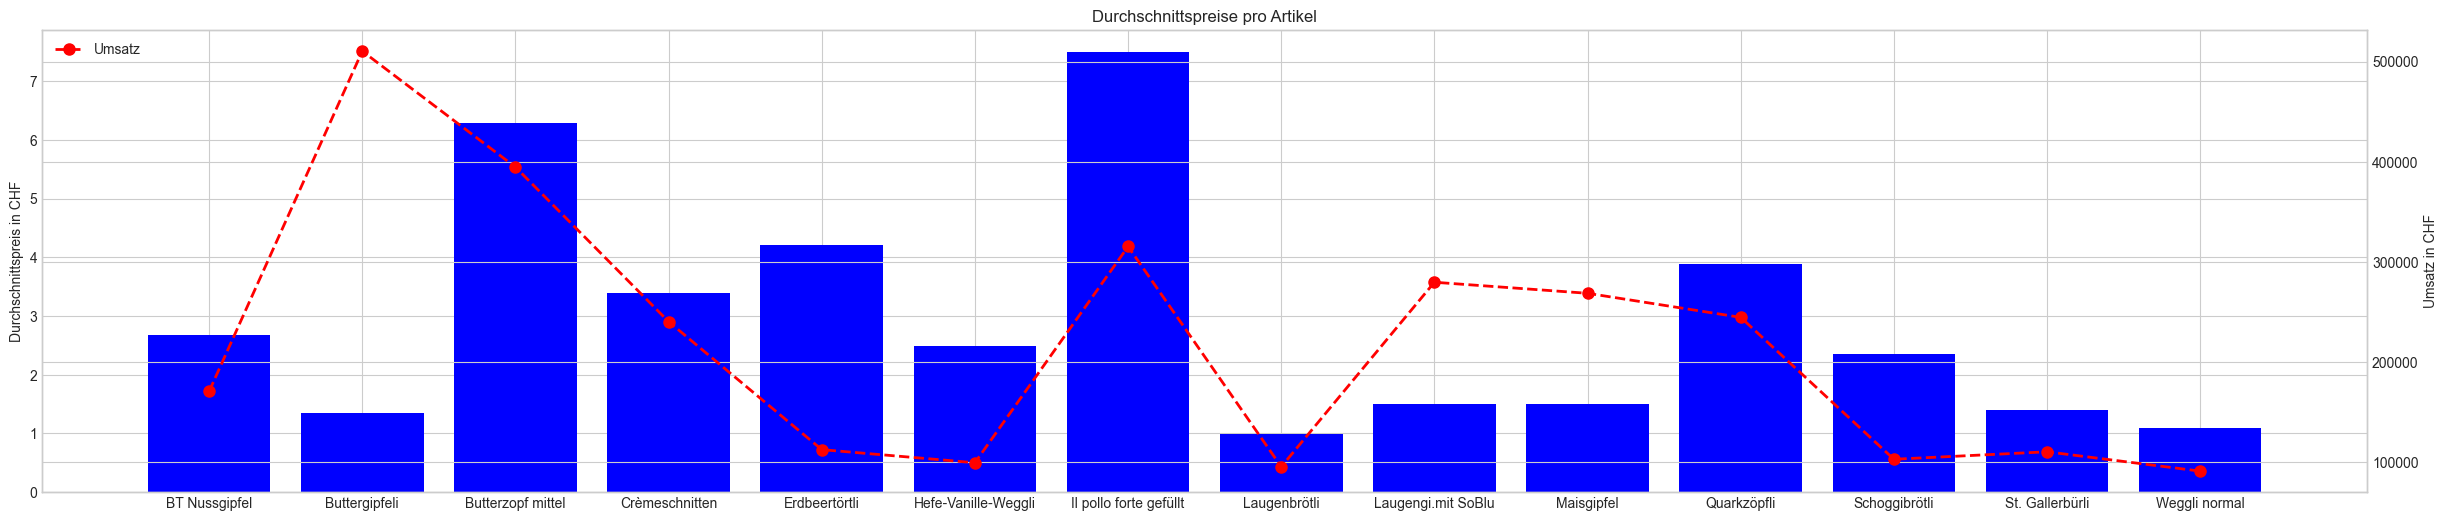

In [ ]:
# Durschnitsspreis und Totalumsatz pro Artikel
product_prices = data.groupby('Artikel')['Umsatz'].sum() / data.groupby('Artikel')['Menge'].sum()
umsatz_pro_artikel = data.groupby('Artikel')['Umsatz'].sum()

# Grösse Plot definieren
fig = plt.figure(figsize=(30, 6))

# Linke y-Achse und die Balken definieren
ax1 = fig.add_subplot(111)
ax1.bar(product_prices.index, product_prices.values, color='b')
ax1.set_ylabel('Durchschnittspreis in CHF')

# Rechte y-Achse und die Linie definieren
ax2 = ax1.twinx()
ax2.plot(product_prices.index, umsatz_pro_artikel.values, color='r', marker='o', linestyle='dashed', linewidth=2, markersize=8)
ax2.set_ylabel('Umsatz in CHF')

# Beschriftung x-Achse und Titel definieren
plt.title('Durchschnittspreise pro Artikel')

# Rotationswinkel der x-Achse definieren
plt.xticks(rotation=45, ha='right')
plt.legend(['Umsatz', 'Durchschnittspreis'], loc='upper left')

# Plot anzeigen
plt.show()

Number of Buttergipfeli orders on 12.04.2021: 85.0
Total amount of Buttergipfeli sold on 12.04.2021: 170.0


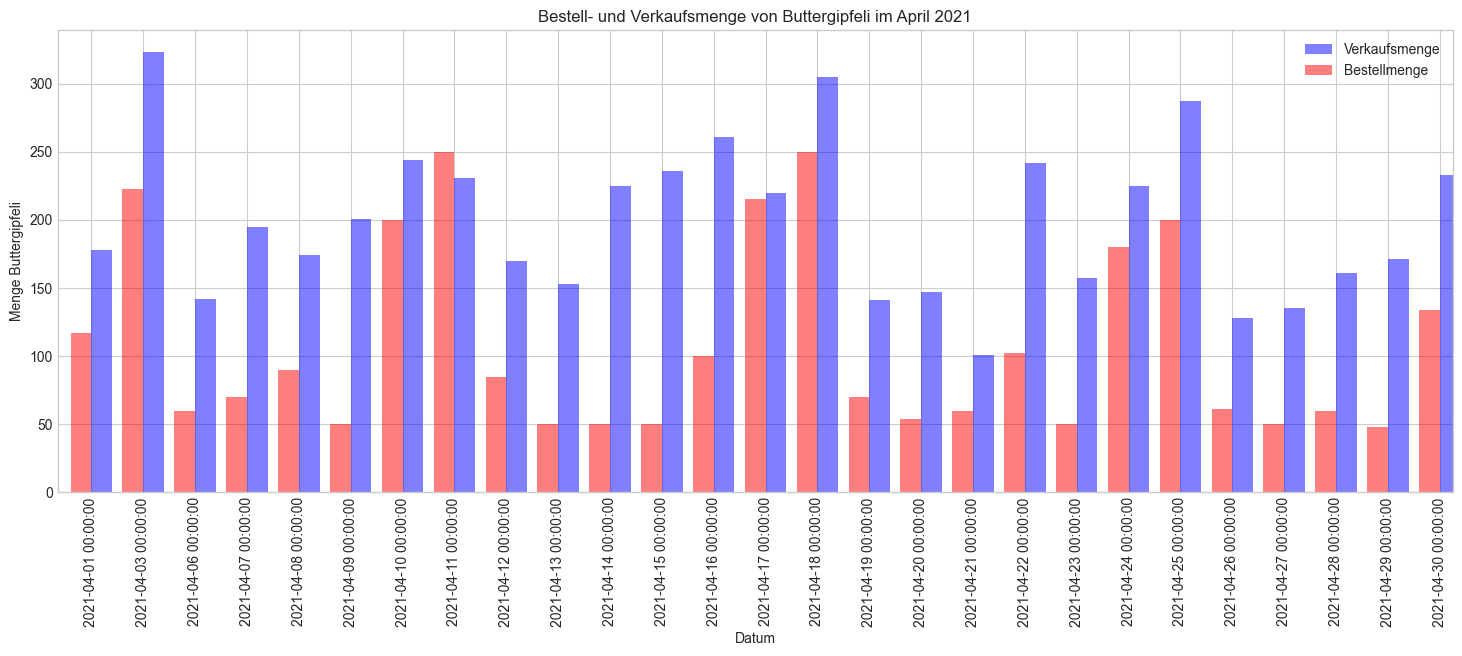

In [ ]:
# Column Datum in Datetime umwandeln
data['Datum'] = pd.to_datetime(data['Datum'], format='%Y-%m-%d')

# Daten von Buttergipfeli nach 12.04.2021 filtern
buttergipfeli_data = data[(data['Artikel'] == 'Buttergipfeli') & (data['Datum'] == '2021-04-12')]

# Ersten Eintrag von Bestellungen ausgeben
buttergipfeli_orders_12042021 = buttergipfeli_data['Bestellungen'].iloc[0]

# Den Gesamtumsatz von Buttergipfeli ausgeben
buttergipfeli_sold_12042021 = buttergipfeli_data['Menge'].sum()

# Resultate ausgeben
print(f"Number of Buttergipfeli orders on 12.04.2021: {buttergipfeli_orders_12042021}")
print(f"Total amount of Buttergipfeli sold on 12.04.2021: {buttergipfeli_sold_12042021}")

# Column Datum in Datetime umwandeln
data['Datum'] = pd.to_datetime(data['Datum'], format='%Y-%m-%d')

# Daten filtern nach April 2021
start_date = '2021-04-01'
end_date = '2021-04-30'
april_data = data[(data['Datum'] >= start_date) & (data['Datum'] <= end_date)]

# Anzahl Bestellungen und Verkaufsmenge von Buttergipfeli ausgeben
sales_by_day = april_data[april_data['Artikel'] == 'Buttergipfeli'].groupby('Datum')['Menge'].sum()
orders_by_day = april_data[april_data['Artikel'] == 'Buttergipfeli'].groupby('Datum')['Bestellungen'].mean()

# Resultat in plot und bar chart ausgeben
fig, ax = plt.subplots(figsize=(18, 6))
sales_by_day.plot(kind='bar', ax=ax, color='blue', alpha=0.5, width=0.4, position=0, label='Verkaufsmenge')
orders_by_day.plot(kind='bar', ax=ax, color='red', alpha=0.5, width=0.4, position=1, label='Bestellmenge')

# Beschriftungen und Titel definieren
ax.set_xlabel('Datum')
ax.set_ylabel('Menge Buttergipfeli')
ax.set_title('Bestell- und Verkaufsmenge von Buttergipfeli im April 2021')

# Chart anzeigen
plt.legend()
plt.show()

In [ ]:
buttergipfel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26153 entries, 170435 to 196587
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Artikel                      26153 non-null  object        
 1   Menge                        26153 non-null  float64       
 2   Umsatz                       26153 non-null  float64       
 3   Bestellungen                 26153 non-null  float64       
 4   Niederschlag                 26054 non-null  float64       
 5   Temperatur Schnitt Tag       26153 non-null  float64       
 6   Niederschlag Summe Tag       26153 non-null  float64       
 7   Globalstrahlung Schnitt Tag  26153 non-null  float64       
 8   Uhrzeit                      26153 non-null  object        
 9   Stunde                       26153 non-null  int64         
 10  Datum                        26153 non-null  datetime64[ns]
 11  Wochentag                    26153 

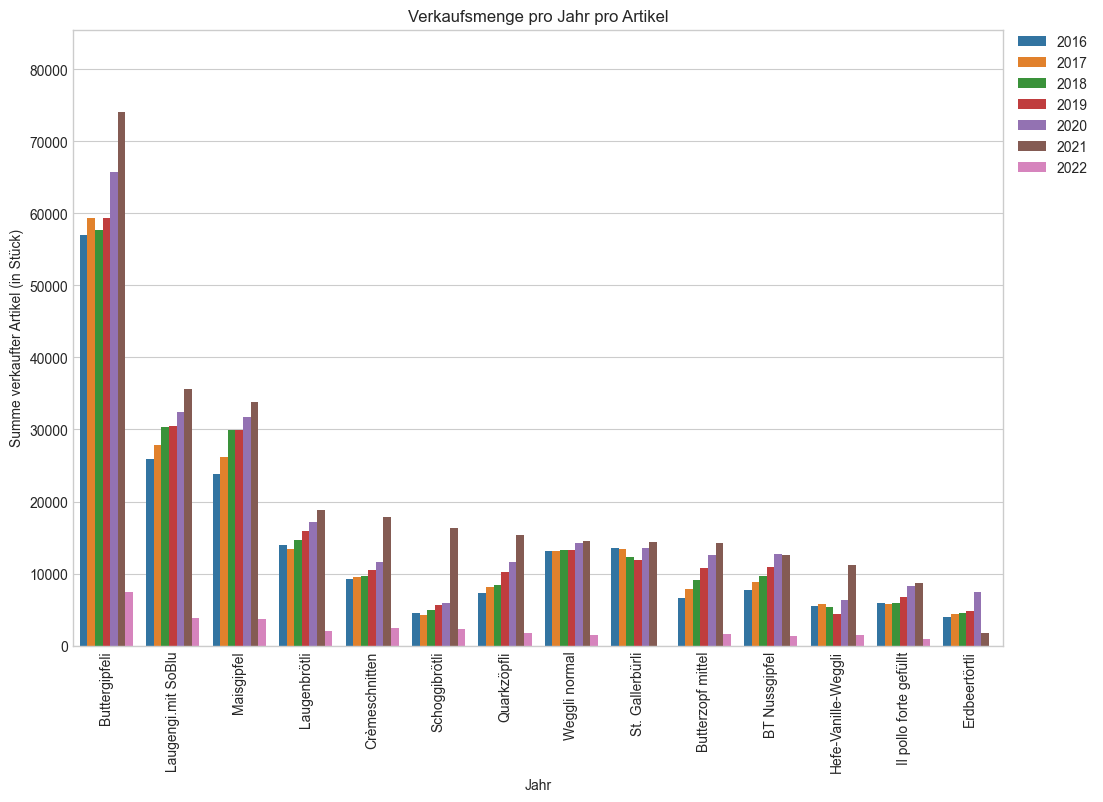

In [ ]:
#Gruppiere die Daten nach Artikel und Jahr und berechne den Mittelwert der Menge-Spalte
grouped_data = data.groupby(['Artikel', data['Datum'].dt.year])['Menge'].sum()

# Konvertieren der gruppierten Daten in Dataframe
data_grouped = grouped_data.reset_index(name='avg_items_sold')

data_grouped_sorted = data_grouped.sort_values(by='avg_items_sold', ascending=False)
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='Artikel', y='avg_items_sold', hue='Datum', data=data_grouped_sorted)
ax.set(title='Verkaufsmenge pro Jahr pro Artikel', ylabel='Summe verkaufter Artikel (in Stück)')
ax.set_xlabel('Jahr')
ax.set_ylabel('Summe verkaufter Artikel (in Stück)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_ylim([0, ax.get_ylim()[1]*1.1]) 
ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()

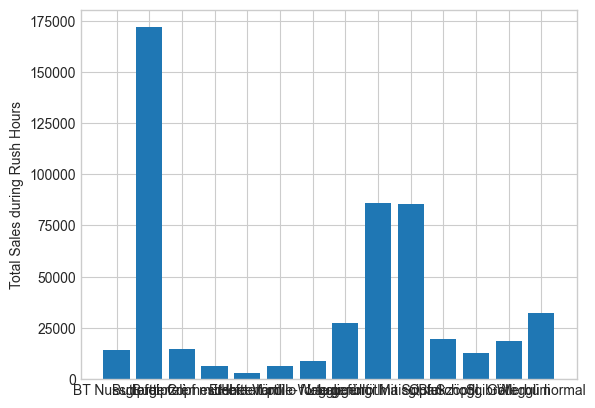

In [ ]:
# Uhrzeit in Stringformat umwandeln
data['Uhrzeit'] = data['Uhrzeit'].astype(str)

# Datenset nach Stosszeiten filtern

rush_hour_data = data[(data['Uhrzeit'] >= '07:00:00') & (data['Uhrzeit'] <= '09:00:00')]

# Daten nach Artikel gruppieren und Summe der Menge berechnen
sales_by_product = rush_hour_data.groupby('Artikel')['Menge'].sum()

# Bar plot  erstellen
plt.bar(np.arange(len(sales_by_product)), sales_by_product.values)
plt.xticks(np.arange(len(sales_by_product)), sales_by_product.index)
plt.ylabel('Total Sales during Rush Hours')
plt.show()


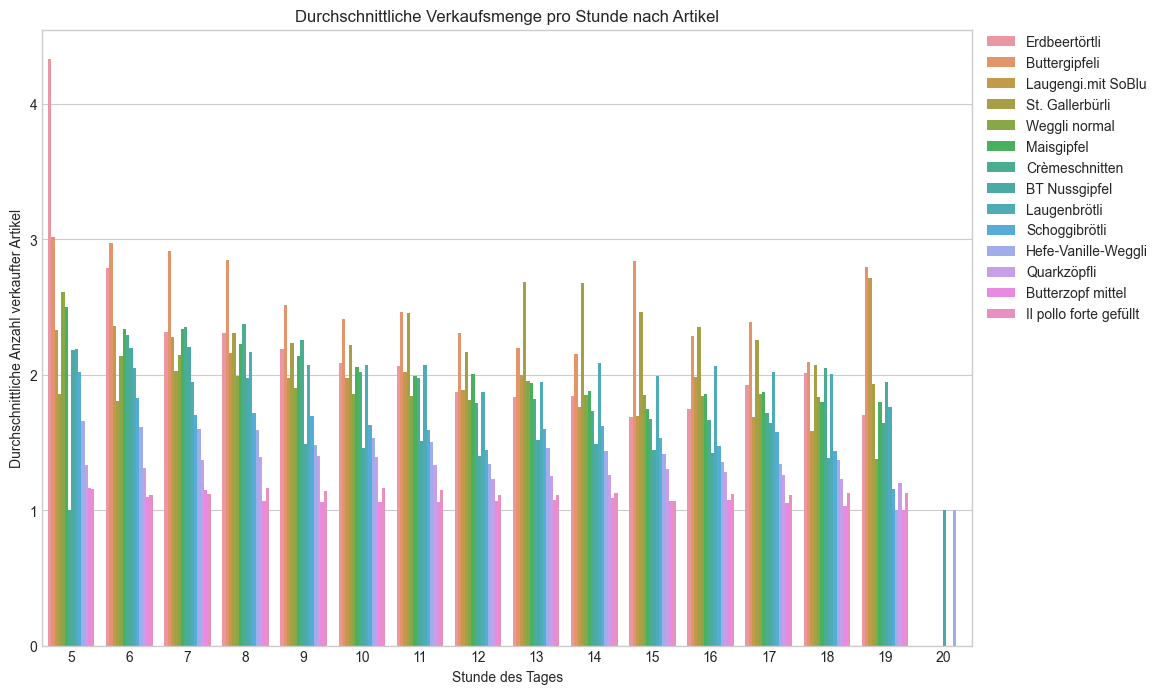

In [ ]:
# Convert the "Uhrzeit" column to a datetime format
data['Uhrzeit'] = pd.to_datetime(data['Uhrzeit'])

# Group the data by Artikel and hour of the day, and calculate the average Menge value
grouped_data = data.groupby(['Artikel', data['Uhrzeit'].dt.hour])['Menge'].mean()

# Convert the grouped data to a DataFrame
data_grouped = grouped_data.reset_index(name='avg_items_sold')

# Sort the data by the average Menge value in descending order
data_grouped_sorted = data_grouped.sort_values(by='avg_items_sold', ascending=False)

# Create the bar plot
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='Uhrzeit', y='avg_items_sold', hue='Artikel', data=data_grouped_sorted)
ax.set(title='Durchschnittliche Verkaufsmenge pro Stunde nach Artikel', xlabel='Stunde des Tages', ylabel='Durchschnittliche Anzahl verkaufter Artikel')

ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()


# 6. Forecasting Modelle

## 6.1 Vorbereitungen

Bevor wir Forecasting Modelle anwenden können müssen wir noch den Datensatz tageweise zusammenfassen

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719185 entries, 0 to 719184
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Artikel                      719185 non-null  object        
 1   Menge                        719185 non-null  float64       
 2   Umsatz                       719185 non-null  float64       
 3   Bestellungen                 719185 non-null  float64       
 4   Niederschlag                 716688 non-null  float64       
 5   Temperatur Schnitt Tag       711227 non-null  float64       
 6   Niederschlag Summe Tag       719185 non-null  float64       
 7   Globalstrahlung Schnitt Tag  711227 non-null  float64       
 8   Uhrzeit                      719185 non-null  datetime64[ns]
 9   Stunde                       719185 non-null  int64         
 10  Datum                        719185 non-null  datetime64[ns]
 11  Wochentag                 

In [ ]:
# Verschiedene Werte in Spalte 'Ferienzeit TG'
data['Ferienzeit TG'].unique()

array([''], dtype=object)

In [ ]:
# Entfernen von Missing Values
data_prep = data.dropna()

# Droppen von Spalten, die nicht zur Regression beitragen
data_prep = data.drop(['Stückpreis', 'Wochentag', 'Umsatz', 'Niederschlag', 'Uhrzeit', 'Stunde'], axis = 1)
data_prep = pd.get_dummies(data_prep, columns = ['Ferienzeit TG', 'Geschmack'])
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719185 entries, 0 to 719184
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Artikel                      719185 non-null  object        
 1   Menge                        719185 non-null  float64       
 2   Bestellungen                 719185 non-null  float64       
 3   Temperatur Schnitt Tag       711227 non-null  float64       
 4   Niederschlag Summe Tag       719185 non-null  float64       
 5   Globalstrahlung Schnitt Tag  711227 non-null  float64       
 6   Datum                        719185 non-null  datetime64[ns]
 7   Monat                        719185 non-null  int64         
 8   Fastenzeit                   719185 non-null  int64         
 9   Ramadan                      719185 non-null  int64         
 10  Ferienzeit TG_               719185 non-null  uint8         
 11  Geschmack_herzhaft        

In [ ]:
data_prep.head()

,Artikel,Menge,Bestellungen,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Datum,Monat,Fastenzeit,Ramadan,Ferienzeit TG_,Geschmack_herzhaft,Geschmack_süss
0,Butterzopf mittel,1.0,0.0,NaN,0.0,NaN,2016-01-03,1,0,0,1,0,1
1,Butterzopf mittel,1.0,0.0,NaN,0.0,NaN,2016-01-03,1,0,0,1,0,1
2,Butterzopf mittel,1.0,0.0,NaN,0.0,NaN,2016-01-03,1,0,0,1,0,1
3,Butterzopf mittel,1.0,0.0,NaN,0.0,NaN,2016-01-03,1,0,0,1,0,1
4,Butterzopf mittel,1.0,0.0,NaN,0.0,NaN,2016-01-03,1,0,0,1,0,1


In [ ]:
# One-Hot-Encoding für die Spalte "Artikel"
#data_prep = pd. get_dummies (data_prep, columns = [ 'Artikel' ])

# Gruppieren der Daten nach Datum und berechnen der Summe der Menge pro Artikel

data_prep = data_prep.groupby(['Datum', 'Artikel']).agg({'Menge': 'sum',
                                                          'Bestellungen': 'sum',
                                                          'Temperatur Schnitt Tag': 'mean',
                                                          'Niederschlag Summe Tag' : 'mean', 
                                                          'Globalstrahlung Schnitt Tag' : 'mean',
                                                          'Fastenzeit' : 'mean',
                                                          'Ramadan' : 'mean',
                                                          'Ferienzeit TG_' : 'mean',
                                                          'Ferienzeit TG_Frühlingsferien' : 'mean',
                                                           'Ferienzeit TG_Herbstferien' : 'mean',
                                                           'Ferienzeit TG_Pfingstferien' : 'mean',
                                                           'Ferienzeit TG_Sommerferien' : 'mean',
                                                           'Ferienzeit TG_Sportferien' : 'mean',
                                                           'Ferienzeit TG_Weihnachtsferien' : 'mean', 
                                                           'Geschmack_herzhaft' : 'mean',
                                                           'Geschmack_süss' : 'mean'}).reset_index()



# Ersetzen der Leerzeichen in Artikel mit Unterstrich
data_prep['Artikel'] = data_prep['Artikel'].str.replace(' ', '_')
data_prep = data_prep.drop('Datum', axis = 1)
data_prep.head()


KeyError: "Column(s) ['Ferienzeit TG_Frühlingsferien', 'Ferienzeit TG_Herbstferien', 'Ferienzeit TG_Pfingstferien', 'Ferienzeit TG_Sommerferien', 'Ferienzeit TG_Sportferien', 'Ferienzeit TG_Weihnachtsferien'] do not exist"

In [ ]:
# Splitten des Datensets in Datasets für die einzelnen Artikel mit einer for-schleife

dataframes = [data_prep[data_prep['Artikel'] == i] for i in data_prep['Artikel'].unique()]

In [ ]:
data_prep.reset_index(drop=True, inplace=True)
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719185 entries, 0 to 719184
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Artikel                      719185 non-null  object        
 1   Menge                        719185 non-null  float64       
 2   Bestellungen                 719185 non-null  float64       
 3   Temperatur Schnitt Tag       711227 non-null  float64       
 4   Niederschlag Summe Tag       719185 non-null  float64       
 5   Globalstrahlung Schnitt Tag  711227 non-null  float64       
 6   Datum                        719185 non-null  datetime64[ns]
 7   Monat                        719185 non-null  int64         
 8   Fastenzeit                   719185 non-null  int64         
 9   Ramadan                      719185 non-null  int64         
 10  Ferienzeit TG_               719185 non-null  uint8         
 11  Geschmack_herzhaft        

In [ ]:
data_prep.head()

,Artikel,Menge,Bestellungen,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Datum,Monat,Fastenzeit,Ramadan,Ferienzeit TG_,Geschmack_herzhaft,Geschmack_süss
0,Butterzopf mittel,1.0,0.0,NaN,0.0,NaN,2016-01-03,1,0,0,1,0,1
1,Butterzopf mittel,1.0,0.0,NaN,0.0,NaN,2016-01-03,1,0,0,1,0,1
2,Butterzopf mittel,1.0,0.0,NaN,0.0,NaN,2016-01-03,1,0,0,1,0,1
3,Butterzopf mittel,1.0,0.0,NaN,0.0,NaN,2016-01-03,1,0,0,1,0,1
4,Butterzopf mittel,1.0,0.0,NaN,0.0,NaN,2016-01-03,1,0,0,1,0,1


## 6.2 XGBoost Regressor

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import xgboost as XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
butterfipfel = data_prep[data_prep['Artikel'] == 'Buttergipfeli']
butterfipfel.head()

# Splitten des Datensets in Trainings- und Testdaten
X = butterfipfel.drop(['Menge', 'Artikel'], axis=1)
y = butterfipfel['Menge']

X_buttergipfel_train, X_buttergipfel_test, y_buttergipfel_train, y_buttergipfel_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen des Modells
model = xgb.XGBRegressor(objective ='reg:squarederror')

# Trainieren des Modells
model.fit(X_buttergipfel_train, y_buttergipfel_train)

# Vorhersagen mit dem Modell
y_buttergipfel_pred = model.predict(X_buttergipfel_test)

# Berechnen des MAPE
mape = mean_absolute_percentage_error(y_buttergipfel_test, y_buttergipfel_pred)
print('MAPE: %.3f' % mape)

MAPE: 0.229


In [ ]:
def train_and_evaluate_product_model(data, product_id):
    # Filter the data for the specific product
    product_data = data[data['Artikel'] == product_id]
    
    # Split the data into features (X) and target (y)
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1)
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error of the model
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = model.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return product_id, MAPE, R2, RMSE


In [ ]:
train_and_evaluate_product_model(data_prep, 'Buttergipfeli')

('Buttergipfeli', 0.22908513311075618, 0.4448867434108026, 56.13346192270077)

In [ ]:
train_and_evaluate_product_model(data_prep, 'BT_Nussgipfel')

('BT_Nussgipfel', 0.2845529414895021, 0.4398049380026059, 10.117425613380936)

# † Code Graveyard † #

Hier kann Code abgelegt werden, der nicht mehr gebraucht wird, aber zu gut ist, um ihn einfach zu löschen. 

In [ ]:
# Tag + Uhrzeit mit maximalem Umsatz
max_umsatz = data[data["Umsatz"] == data["Umsatz"].max()]
max_umsatz_Tag = max_umsatz["Wochentag"].values[0]
max_umsatz_stunde = max_umsatz["Uhrzeit"].values[0]
print("Der höchste Umsatz wurde am {} um {} Uhr erzielt.".format(max_umsatz_Tag, max_umsatz_stunde))



Der höchste Umsatz wurde am Sunday um 2023-04-16T15:51:41.000000000 Uhr erzielt.


In [ ]:
data_2020 = data
data_2020 = data[data['Datum'].dt.year == 2020]
daily_total = data_2021.groupby(data_2021['Datum'])['Umsatz'].sum().reset_index()
smallest_daily_total = daily_total.sort_values('Umsatz', ascending=True)

print(smallest_daily_total)


KeyError: 'Datum'

In [ ]:
#models = {}

for product_id in data_prep['Artikel']:
    product_train_data = data_prep[data_prep["Artikel"] == product_id]
    product_train_data = product_train_data.drop(columns=["Artikel", 'Datum'])
    product_train_X = product_train_data.drop(columns=["Menge"])
    product_train_y = product_train_data["Menge"]

    model = xgb.XGBRegressor(objective="reg:squarederror")
    model.fit(product_train_X, product_train_y)
    models[product_id] = model
